In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import boxcox, inv_boxcox
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn import datasets, metrics


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [16]:
df = pd.read_csv("Daegu_Real_Estate_data.csv")
df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


In [19]:
df2 = df.copy()

In [20]:
df2.shape

(5891, 30)

In [21]:
df2.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


In [22]:
print(df2.apply(lambda col: col.nunique()))

SalePrice                             949
YearBuilt                              16
YrSold                                 11
MonthSold                              12
Size(sqf)                              92
Floor                                  43
HallwayType                             3
HeatingType                             2
AptManageType                           2
N_Parkinglot(Ground)                   23
N_Parkinglot(Basement)                 20
TimeToBusStop                           3
TimeToSubway                            5
N_APT                                   9
N_manager                               9
N_elevators                            13
SubwayStation                           8
N_FacilitiesNearBy(PublicOffice)        8
N_FacilitiesNearBy(Hospital)            3
N_FacilitiesNearBy(Dpartmentstore)      3
N_FacilitiesNearBy(Mall)                3
N_FacilitiesNearBy(ETC)                 4
N_FacilitiesNearBy(Park)                3
N_SchoolNearBy(Elementary)        

In [23]:
print(df2.apply(lambda col: col.unique()))

SalePrice                             [141592, 51327, 48672, 380530, 221238, 35840, ...
YearBuilt                             [2006, 1985, 1993, 1992, 1986, 2007, 1997, 200...
YrSold                                [2007, 2008, 2009, 2010, 2011, 2012, 2013, 201...
MonthSold                                       [8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7]
Size(sqf)                             [814, 587, 2056, 1761, 355, 644, 1377, 914, 86...
Floor                                 [3, 8, 6, 5, 2, 10, 13, 4, 11, 18, 7, 24, 1, 2...
HallwayType                                                 [terraced, corridor, mixed]
HeatingType                                       [individual_heating, central_heating]
AptManageType                                    [management_in_trust, self_management]
N_Parkinglot(Ground)                  [111.0, 80.0, 249.0, 523.0, 200.0, 142.0, 713....
N_Parkinglot(Basement)                [184.0, 76.0, 536.0, 0.0, 79.0, 1270.0, 18.0, ...
TimeToBusStop                   

In [24]:
df2.dtypes

SalePrice                               int64
YearBuilt                               int64
YrSold                                  int64
MonthSold                               int64
Size(sqf)                               int64
Floor                                   int64
HallwayType                            object
HeatingType                            object
AptManageType                          object
N_Parkinglot(Ground)                  float64
N_Parkinglot(Basement)                float64
TimeToBusStop                          object
TimeToSubway                           object
N_APT                                 float64
N_manager                             float64
N_elevators                           float64
SubwayStation                          object
N_FacilitiesNearBy(PublicOffice)      float64
N_FacilitiesNearBy(Hospital)            int64
N_FacilitiesNearBy(Dpartmentstore)    float64
N_FacilitiesNearBy(Mall)              float64
N_FacilitiesNearBy(ETC)           

In [25]:
df2.YearBuilt.unique()

array([2006, 1985, 1993, 1992, 1986, 2007, 1997, 2005, 2003, 1978, 2009,
       2008, 1980, 2013, 2014, 2015], dtype=int64)

In [26]:
df2['Apt_Age'] = 2022 - df2['YearBuilt']

In [28]:
df2.drop(["YearBuilt"], axis = 1, inplace = True)

In [31]:
df2.drop(["YrSold"], axis = 1, inplace = True)

In [32]:
df2.drop(["MonthSold"], axis = 1, inplace = True)

In [66]:
df2.drop(["SalePrice"], axis = 1, inplace = True)

In [67]:
df2.columns

Index(['Size(sqf)', 'Floor', 'HallwayType', 'HeatingType', 'AptManageType',
       'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'TimeToBusStop',
       'TimeToSubway', 'N_APT', 'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)', 'Apt_Age'],
      dtype='object')

In [69]:
print(df2.apply(lambda col: col.nunique()))

Size(sqf)                             92
Floor                                 43
HallwayType                            3
HeatingType                            2
AptManageType                          2
N_Parkinglot(Ground)                  23
N_Parkinglot(Basement)                20
TimeToBusStop                          3
TimeToSubway                           5
N_APT                                  9
N_manager                              9
N_elevators                           13
SubwayStation                          8
N_FacilitiesNearBy(PublicOffice)       8
N_FacilitiesNearBy(Hospital)           3
N_FacilitiesNearBy(Dpartmentstore)     3
N_FacilitiesNearBy(Mall)               3
N_FacilitiesNearBy(ETC)                4
N_FacilitiesNearBy(Park)               3
N_SchoolNearBy(Elementary)             5
N_SchoolNearBy(Middle)                 5
N_SchoolNearBy(High)                   6
N_SchoolNearBy(University)             6
N_FacilitiesInApt                      9
N_FacilitiesNear

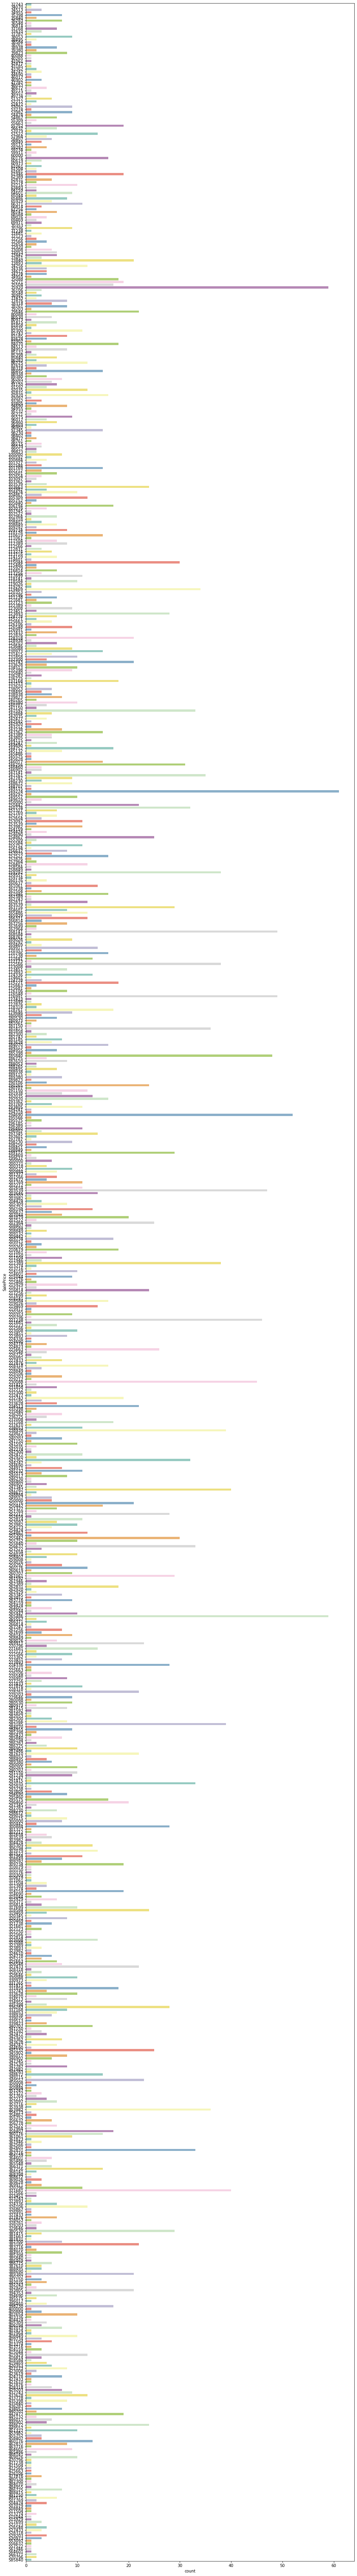

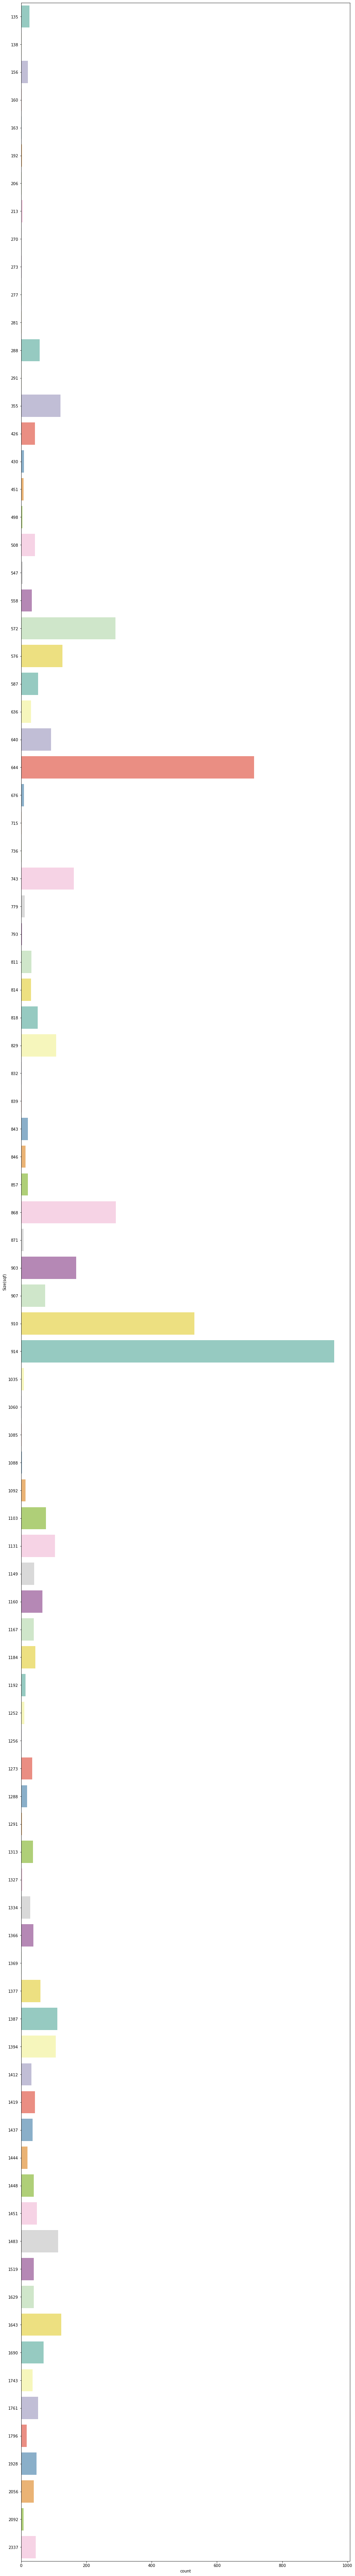

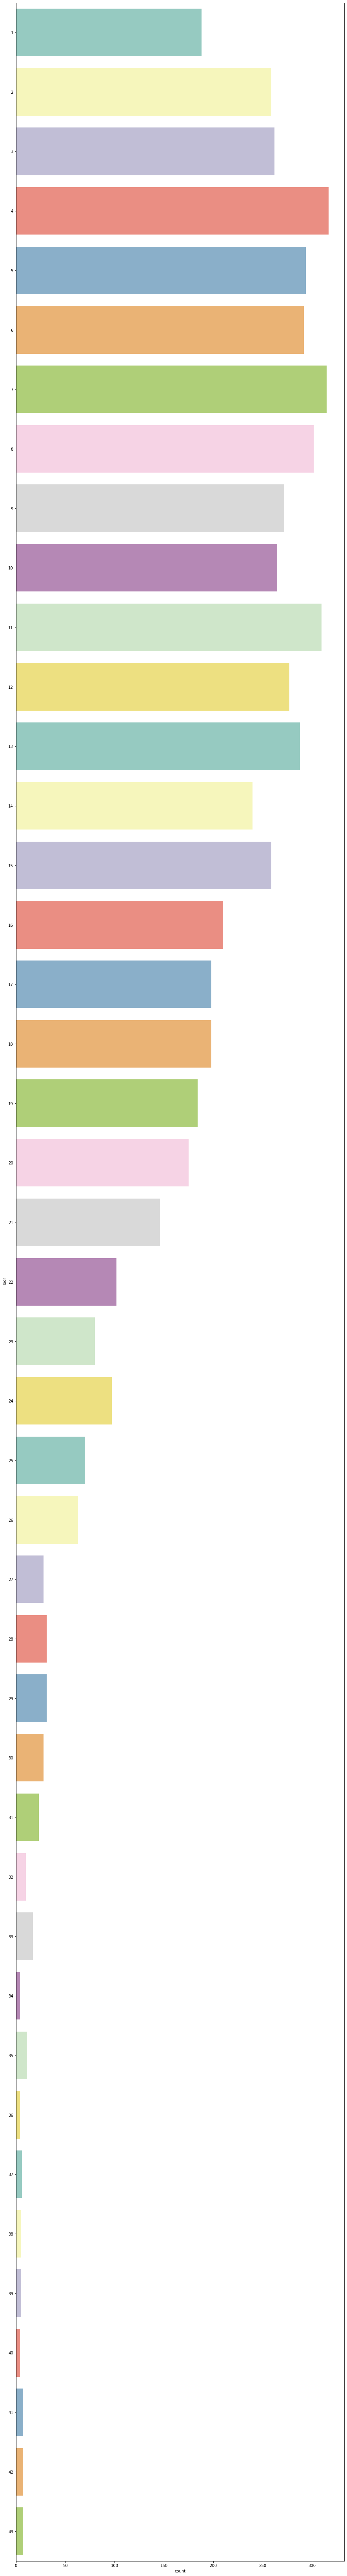

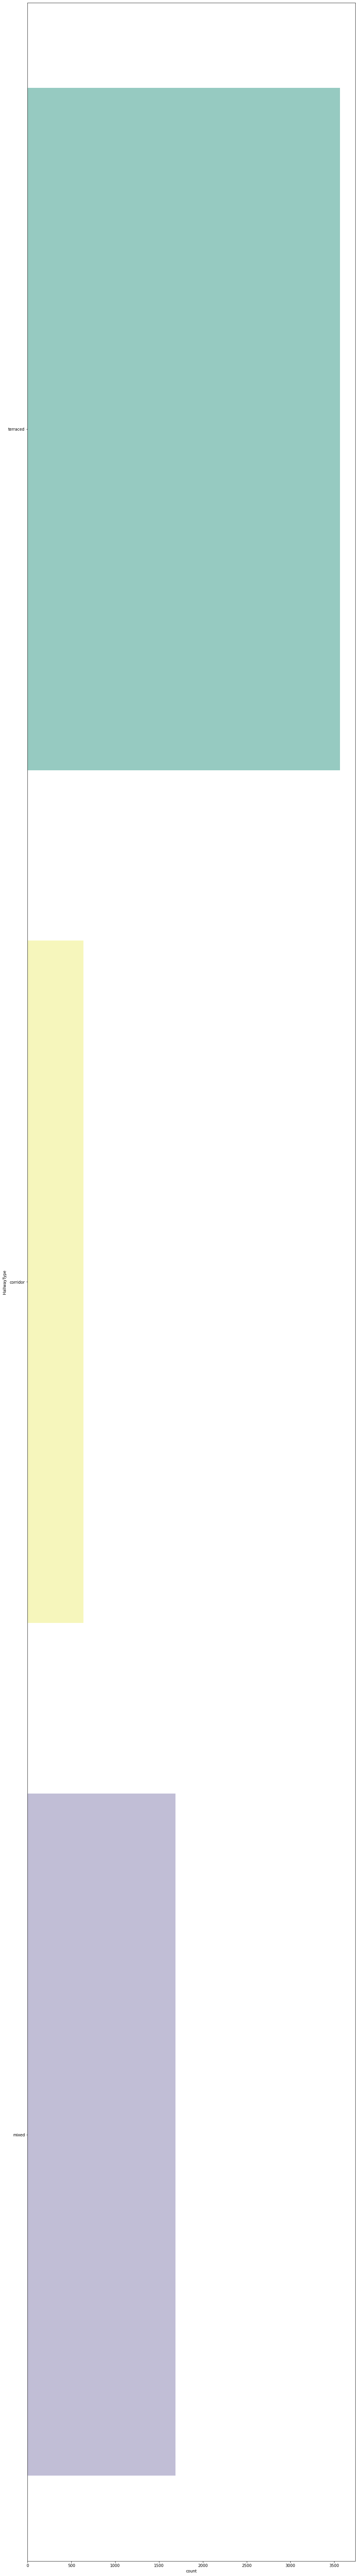

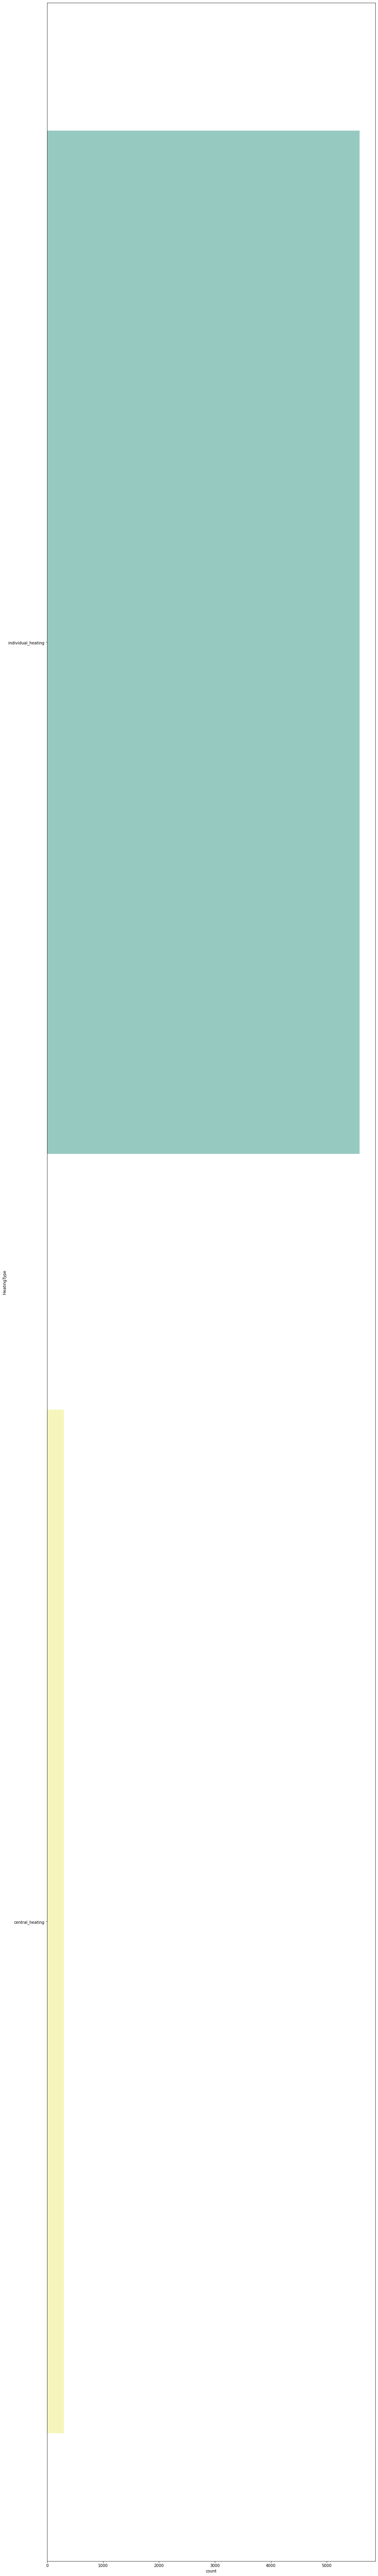

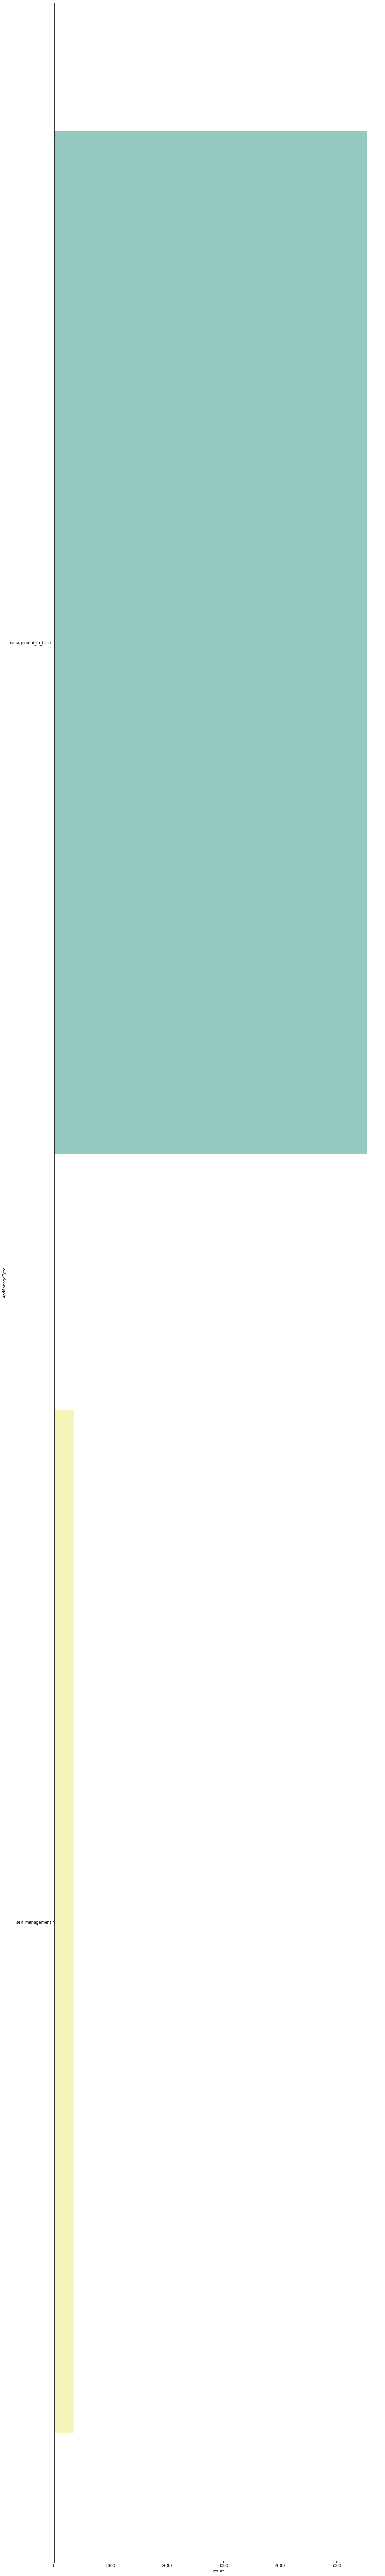

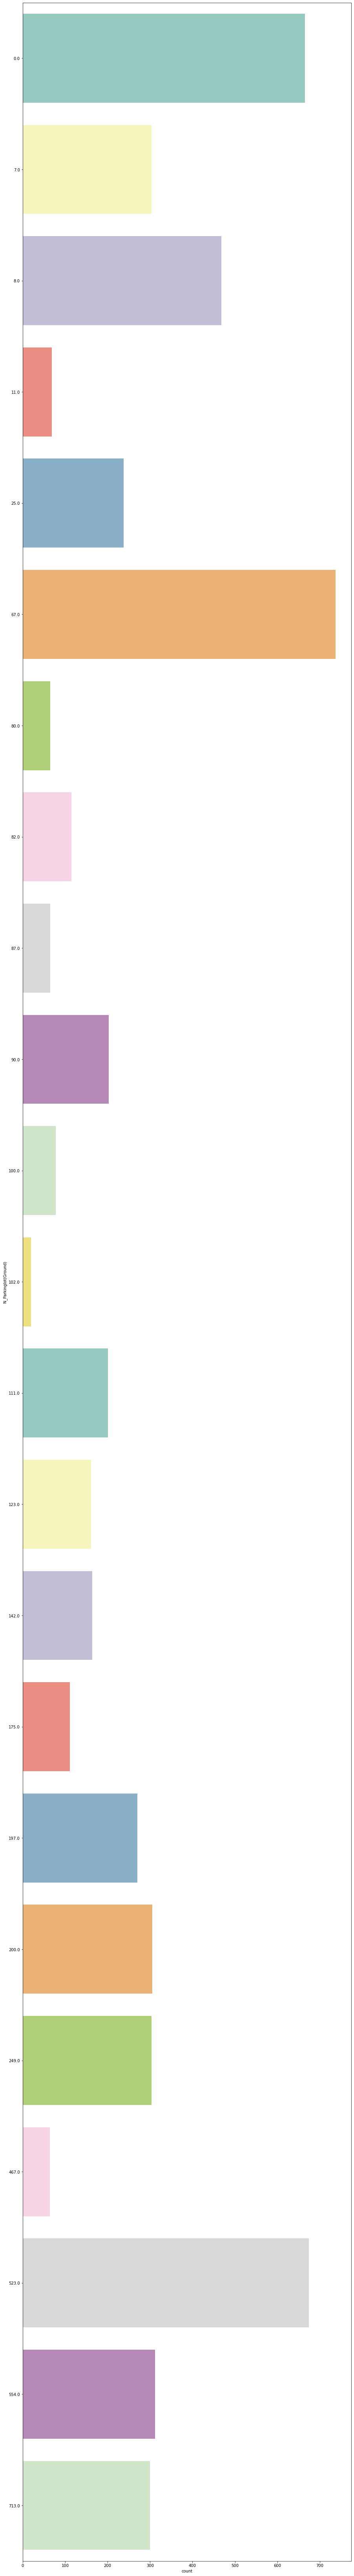

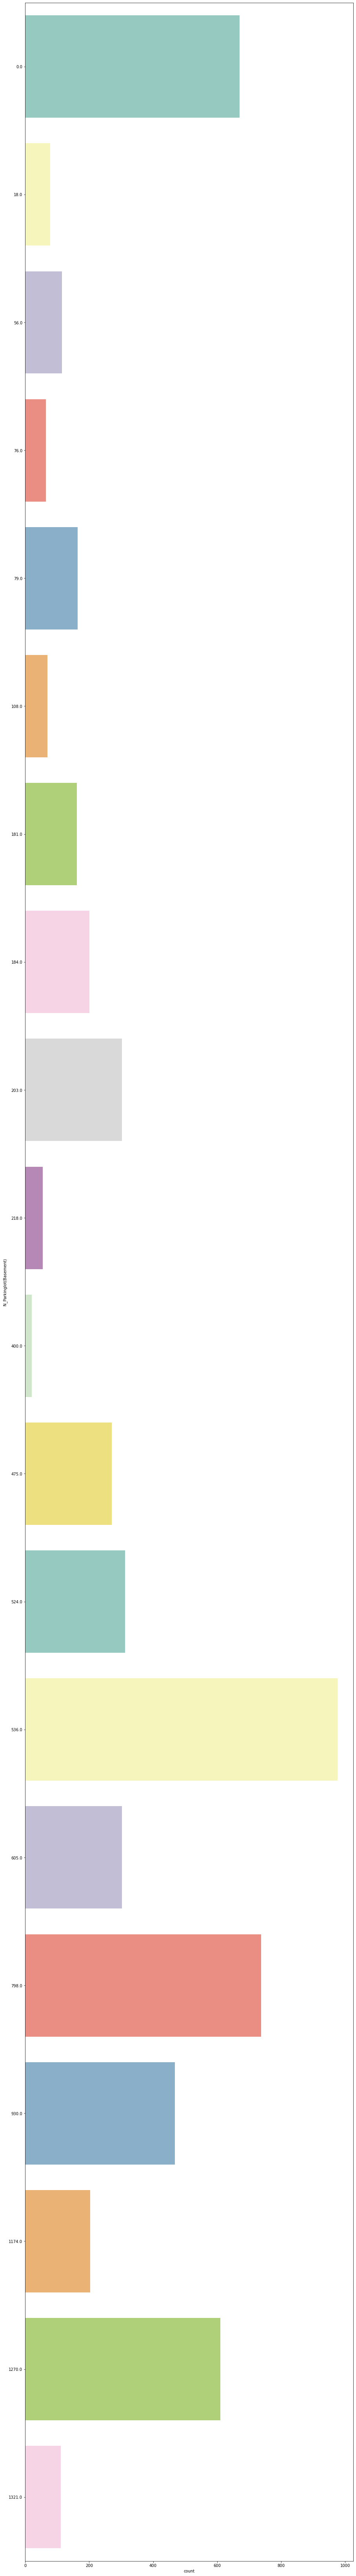

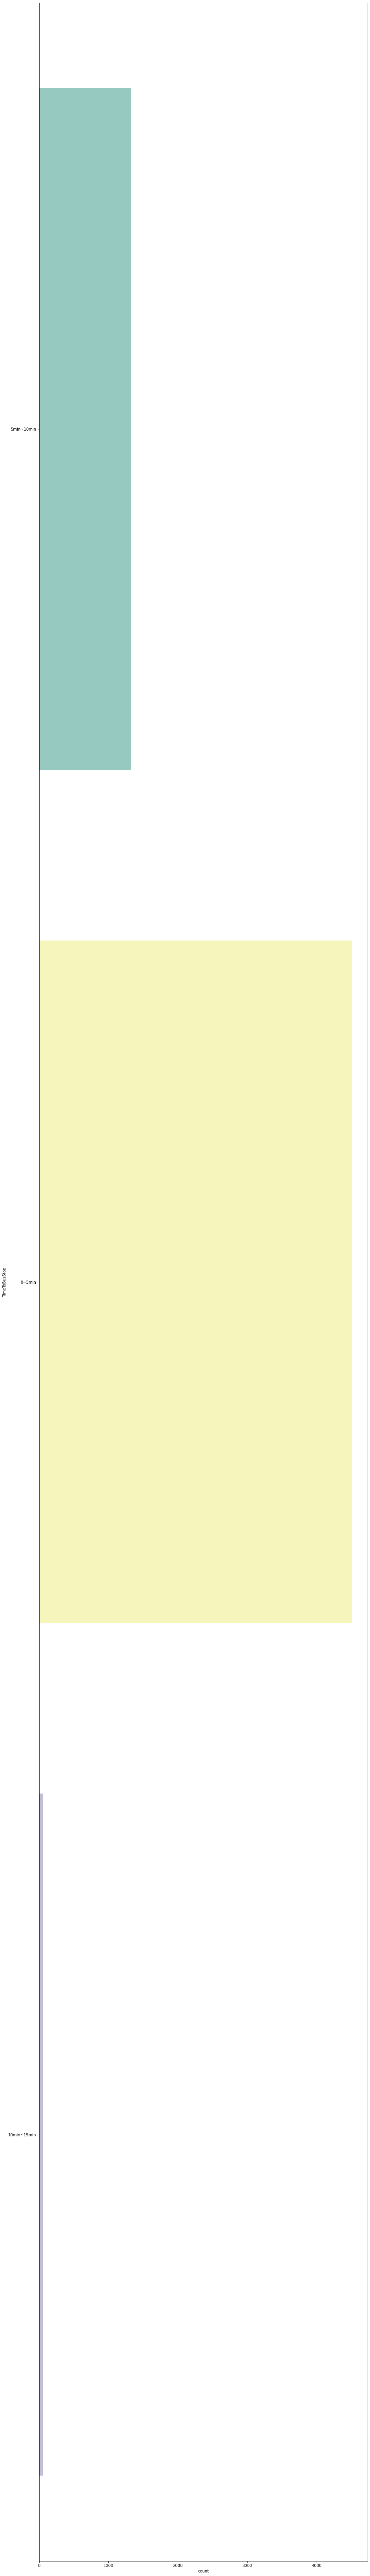

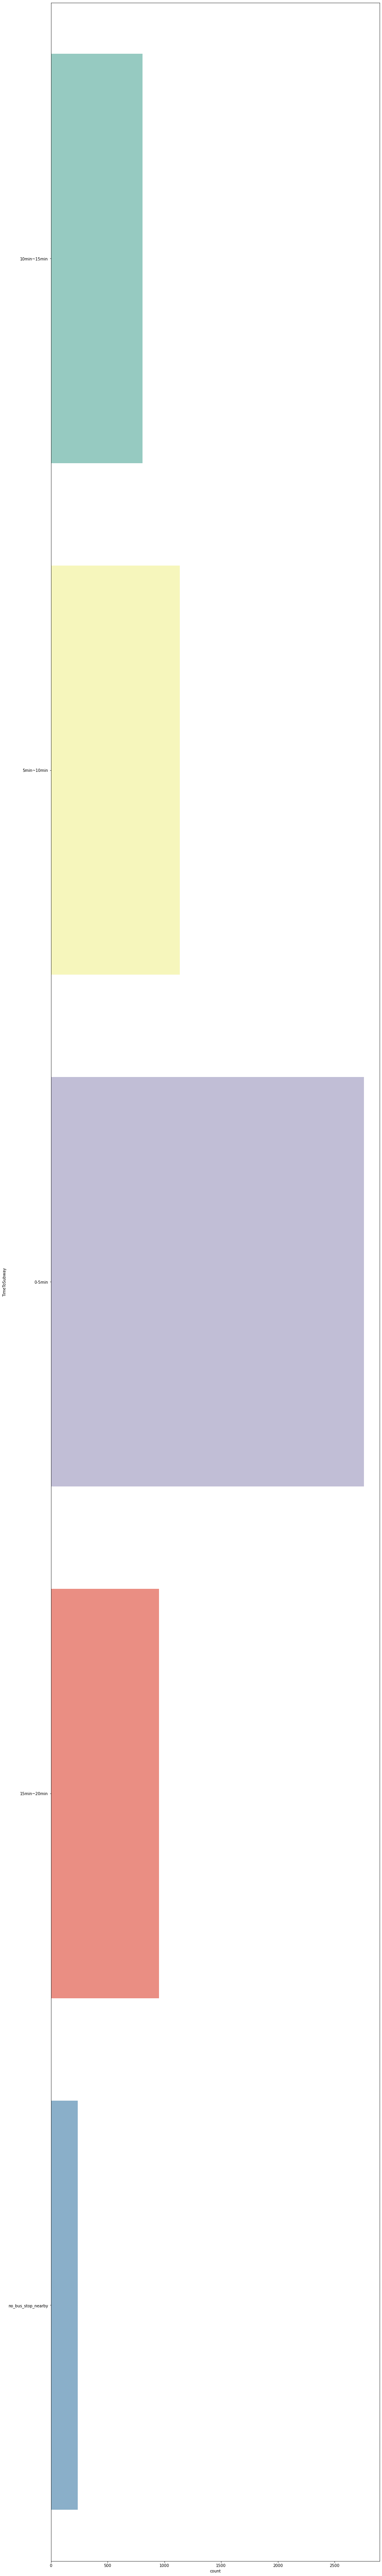

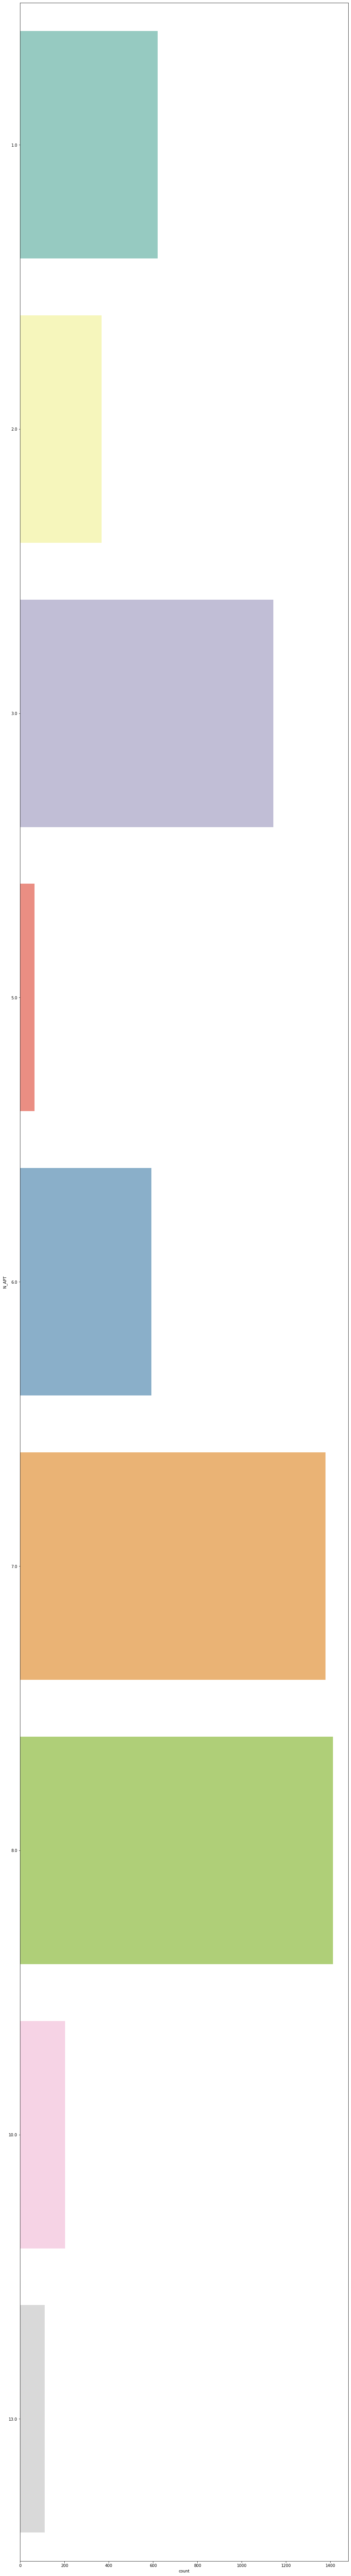

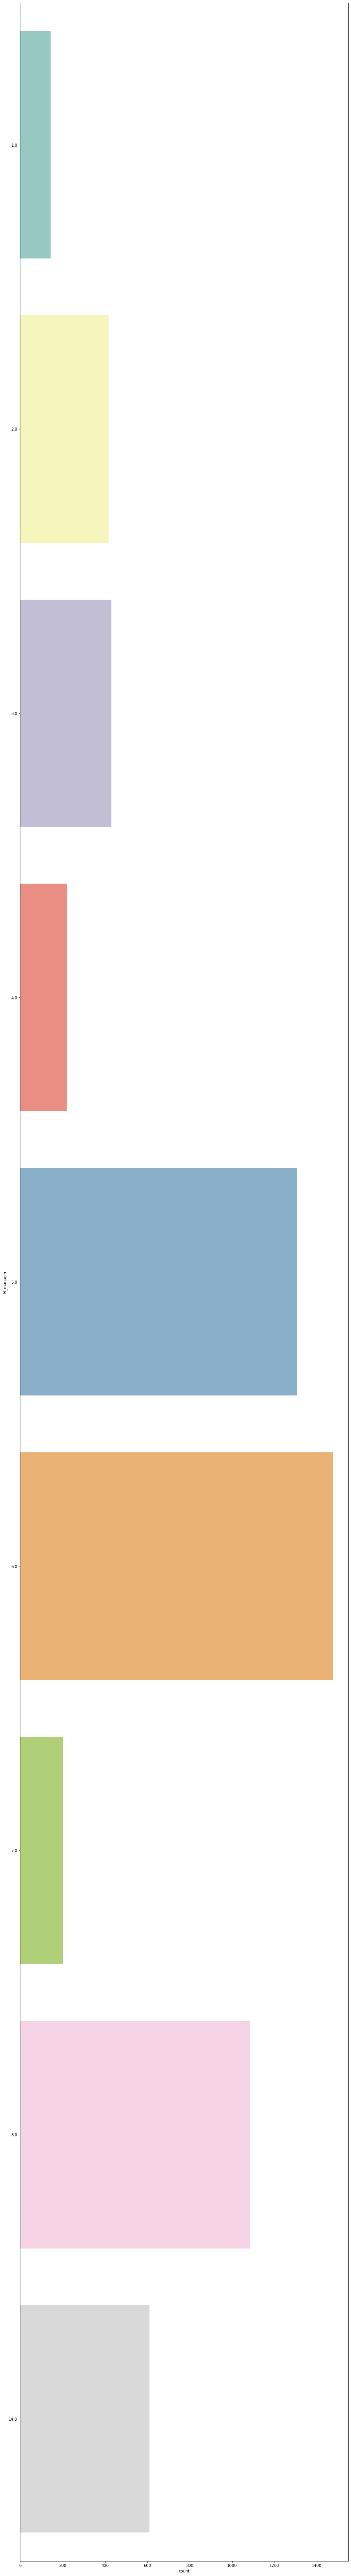

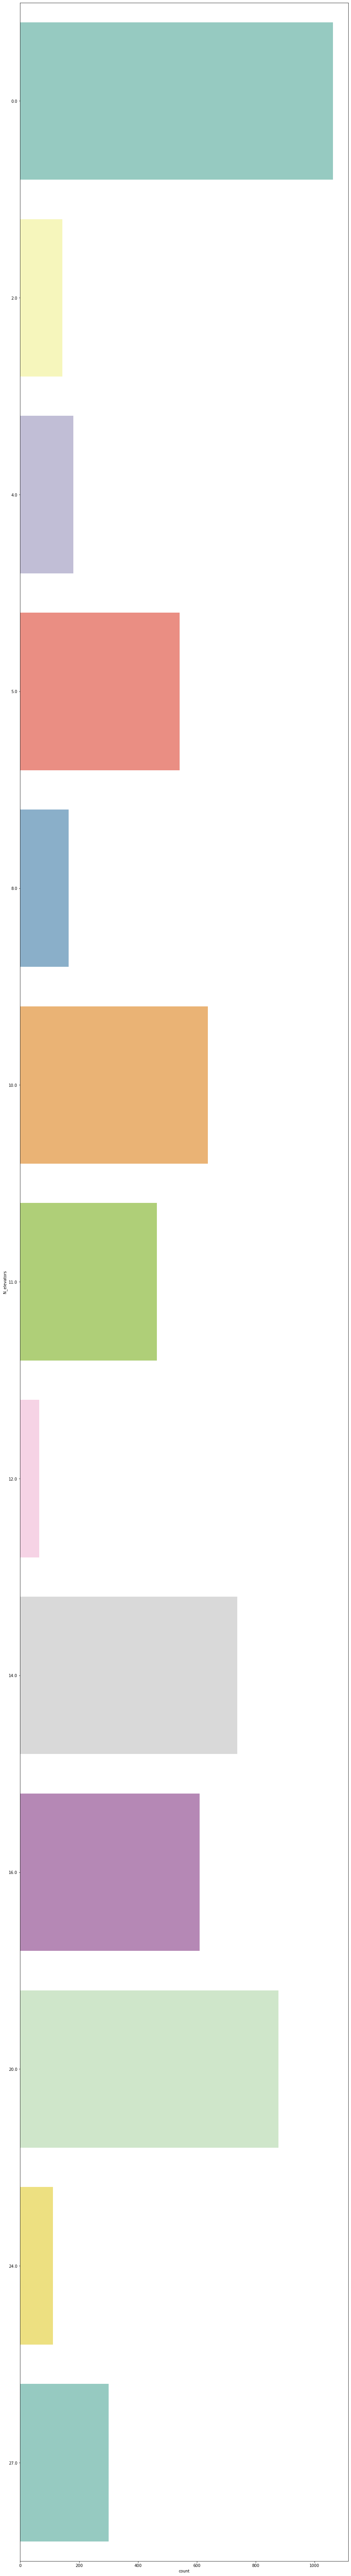

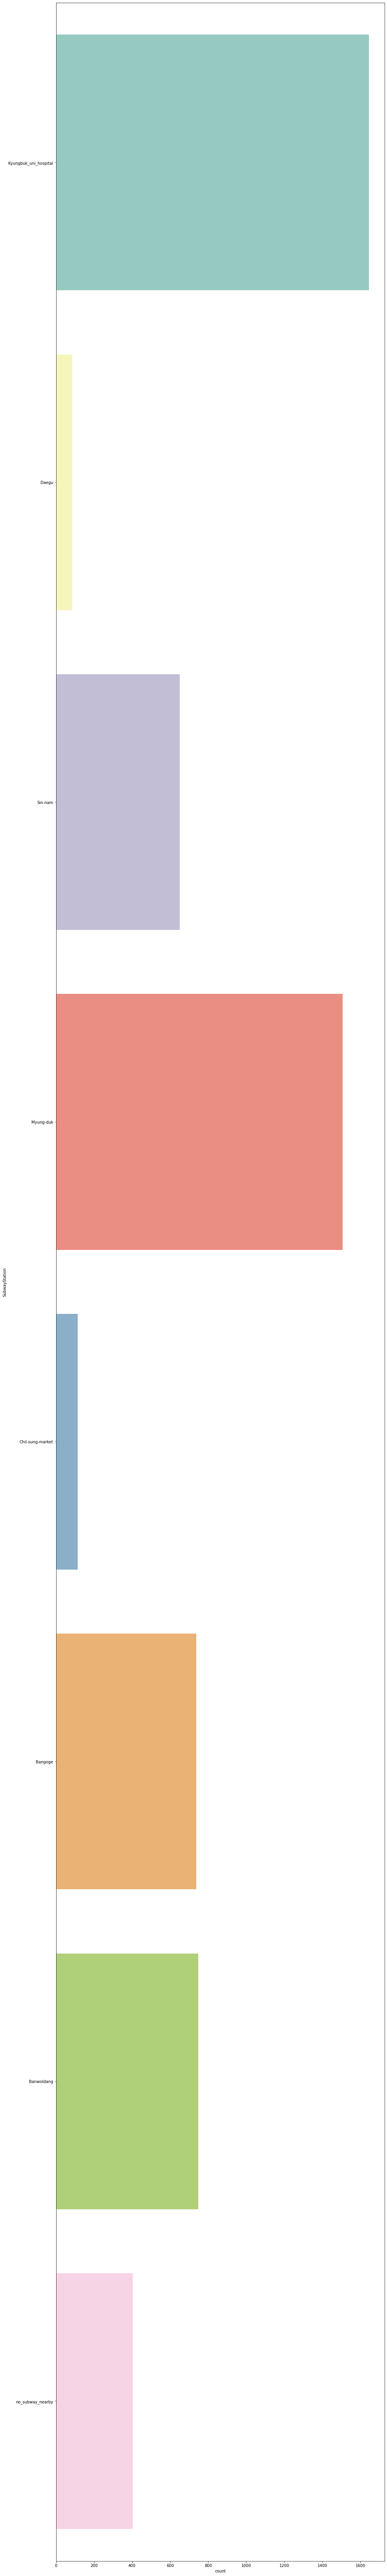

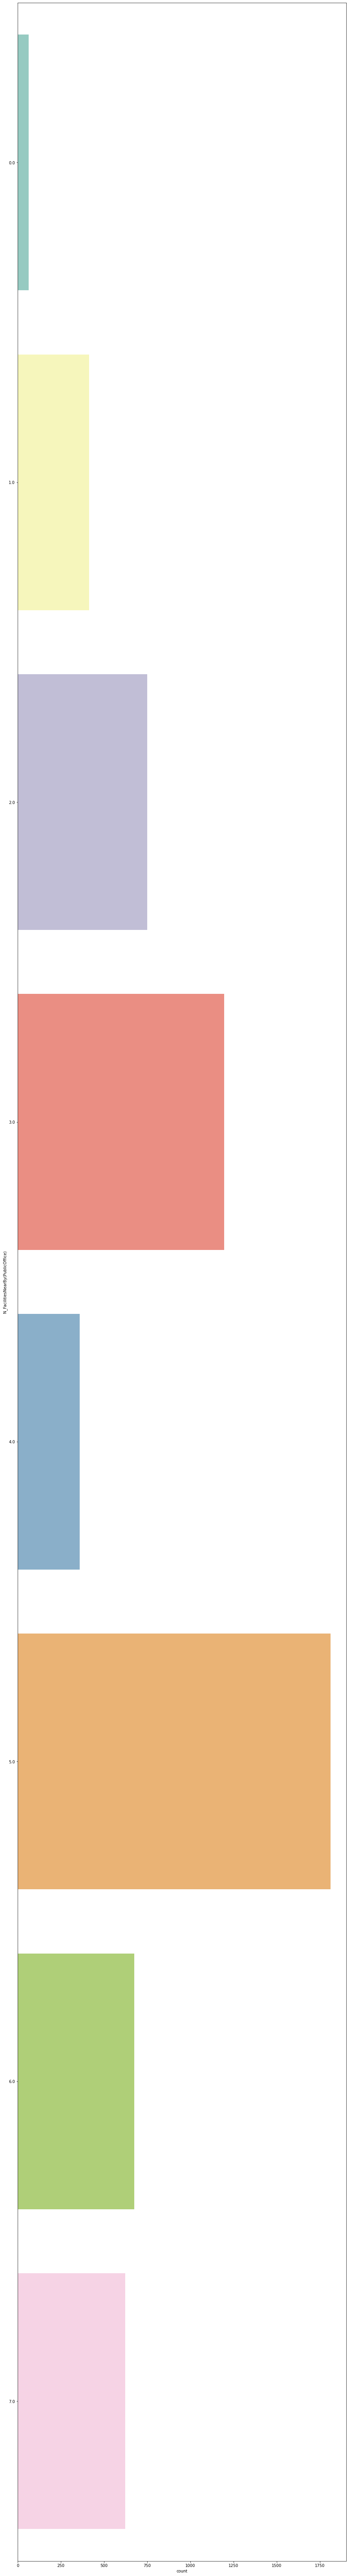

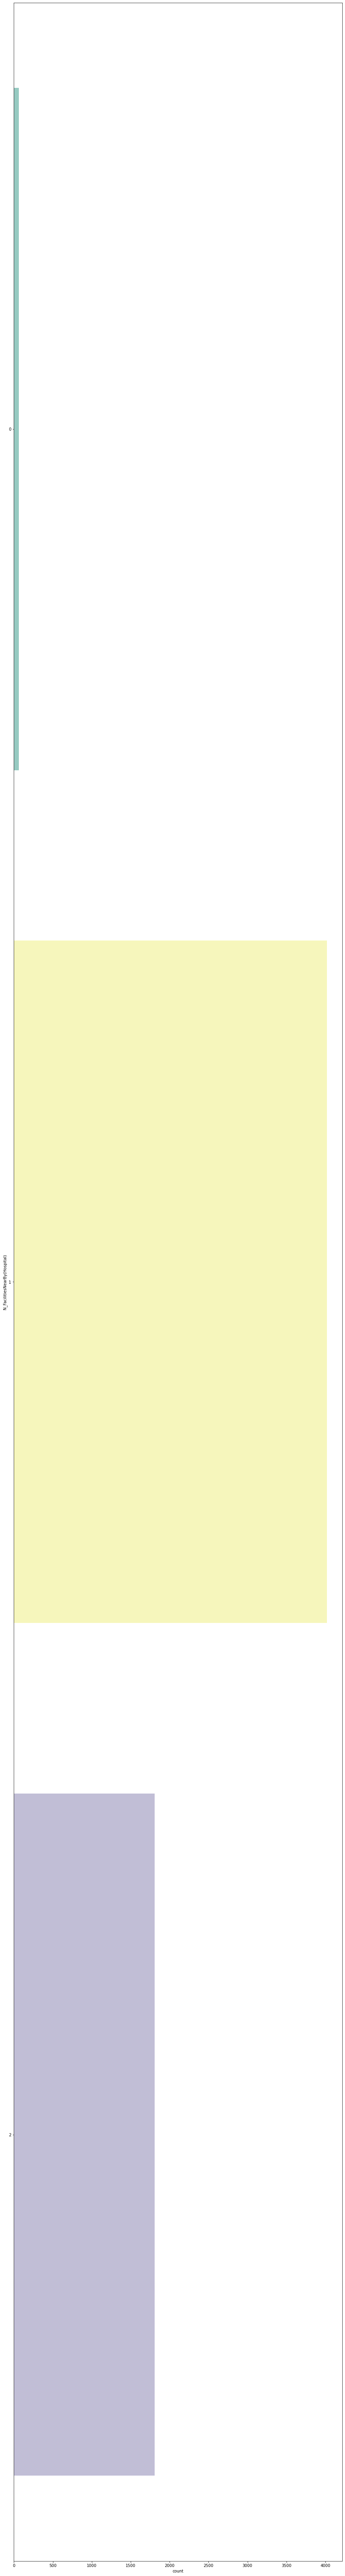

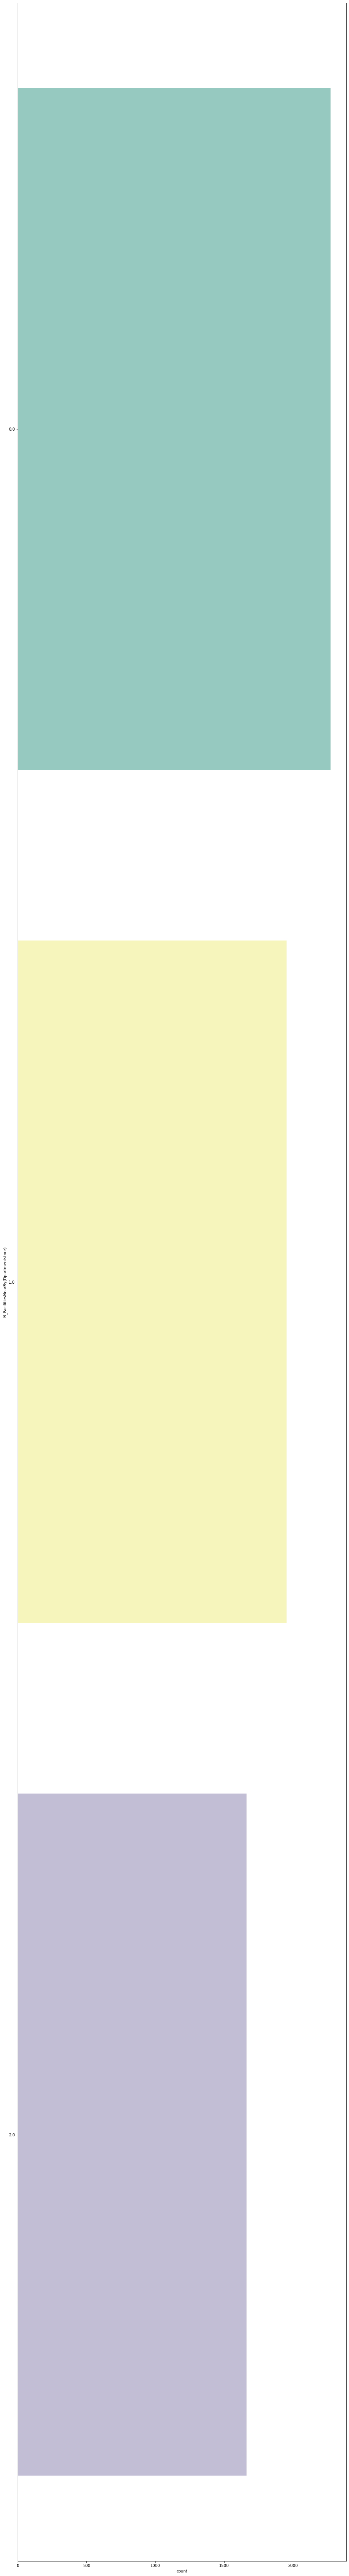

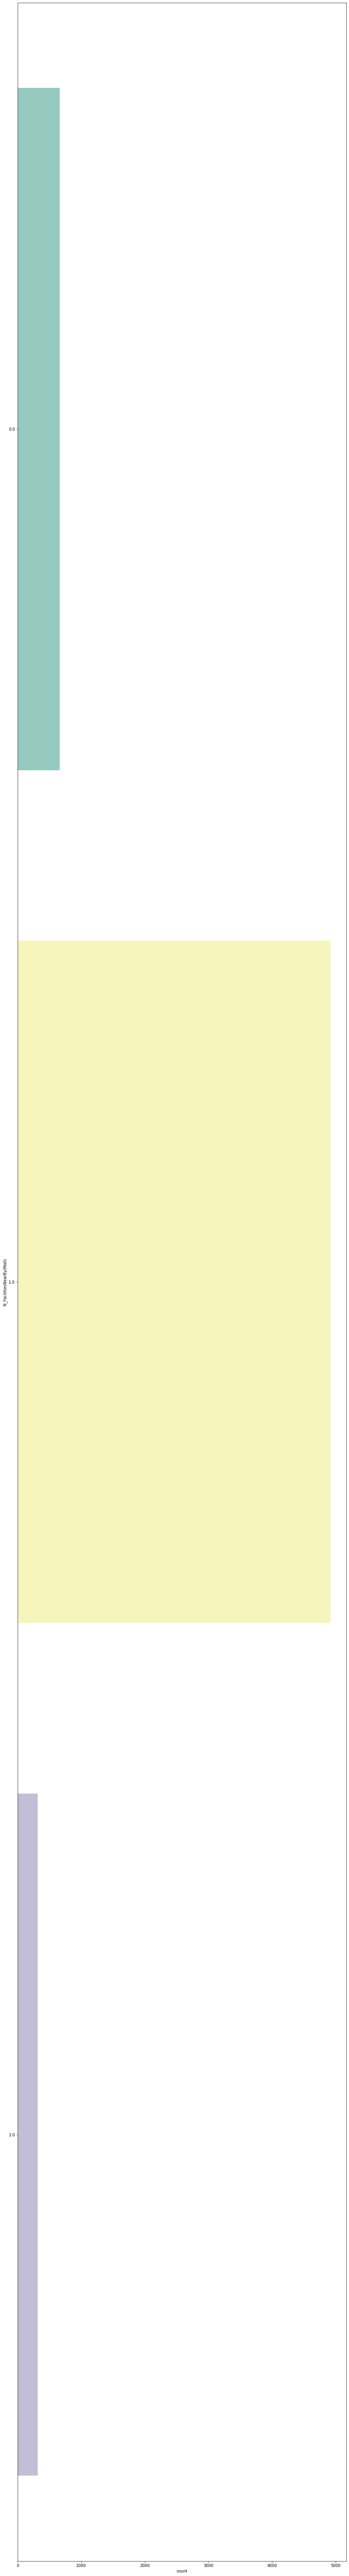

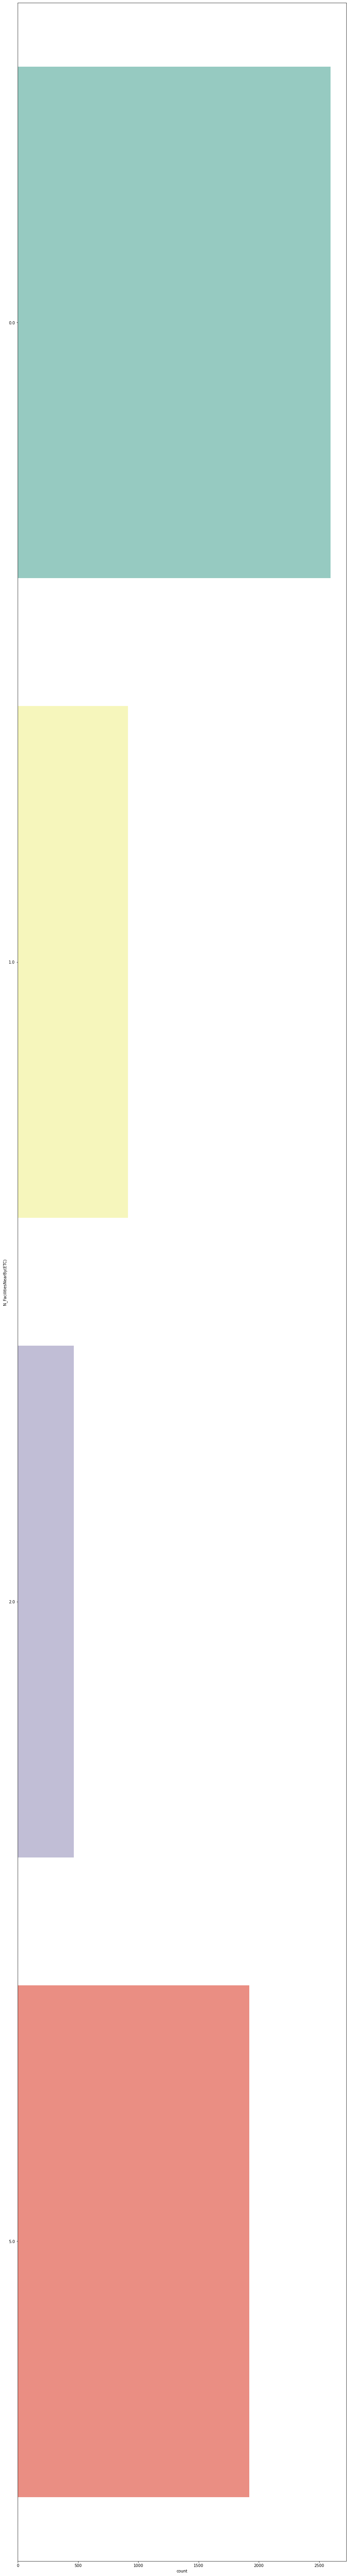

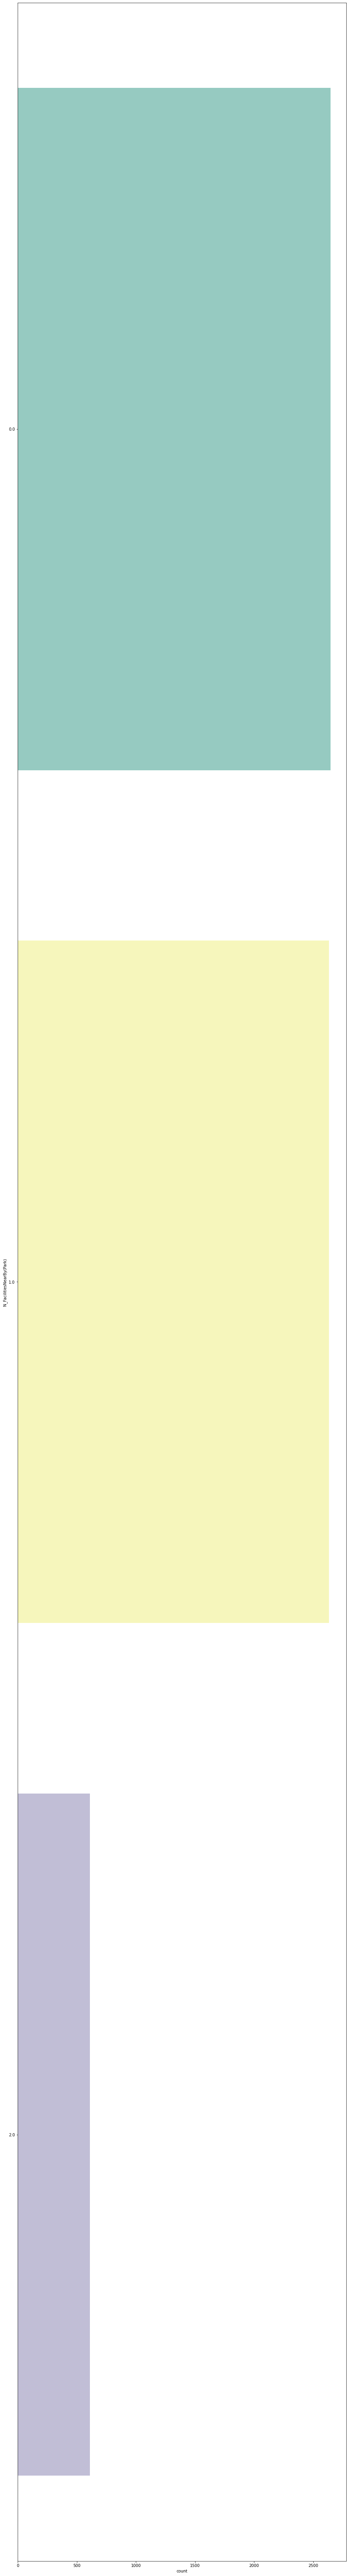

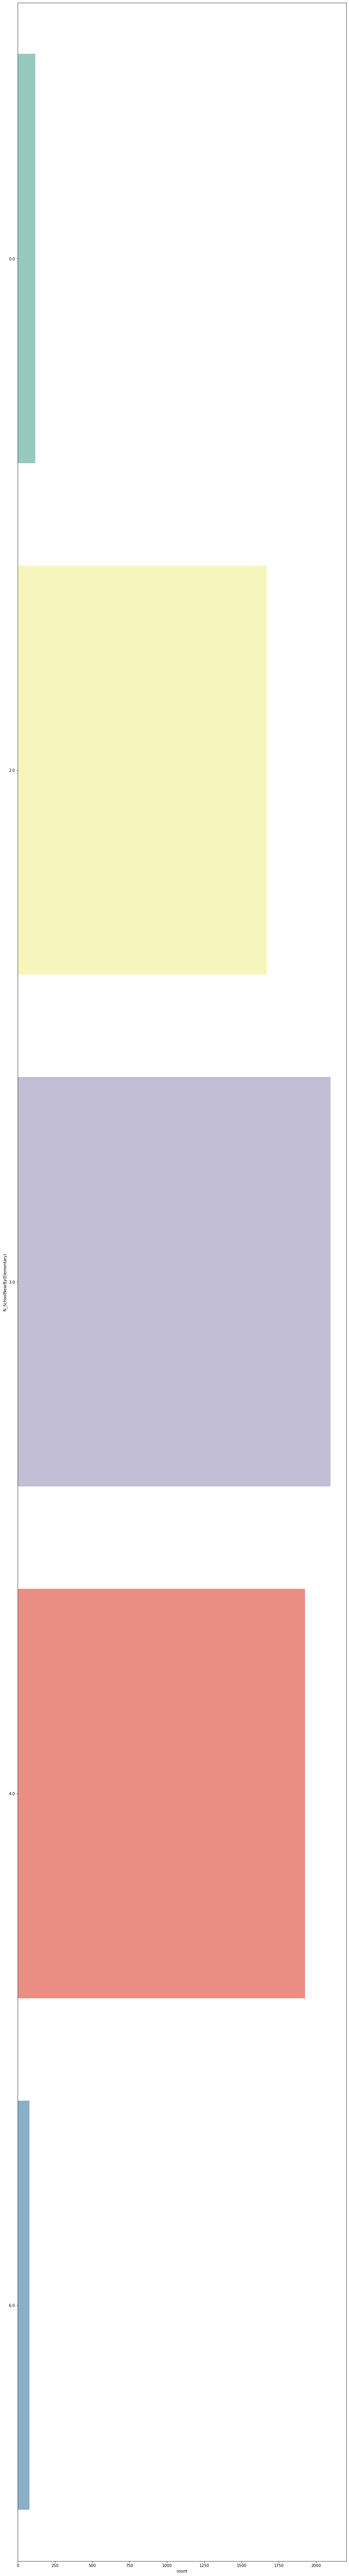

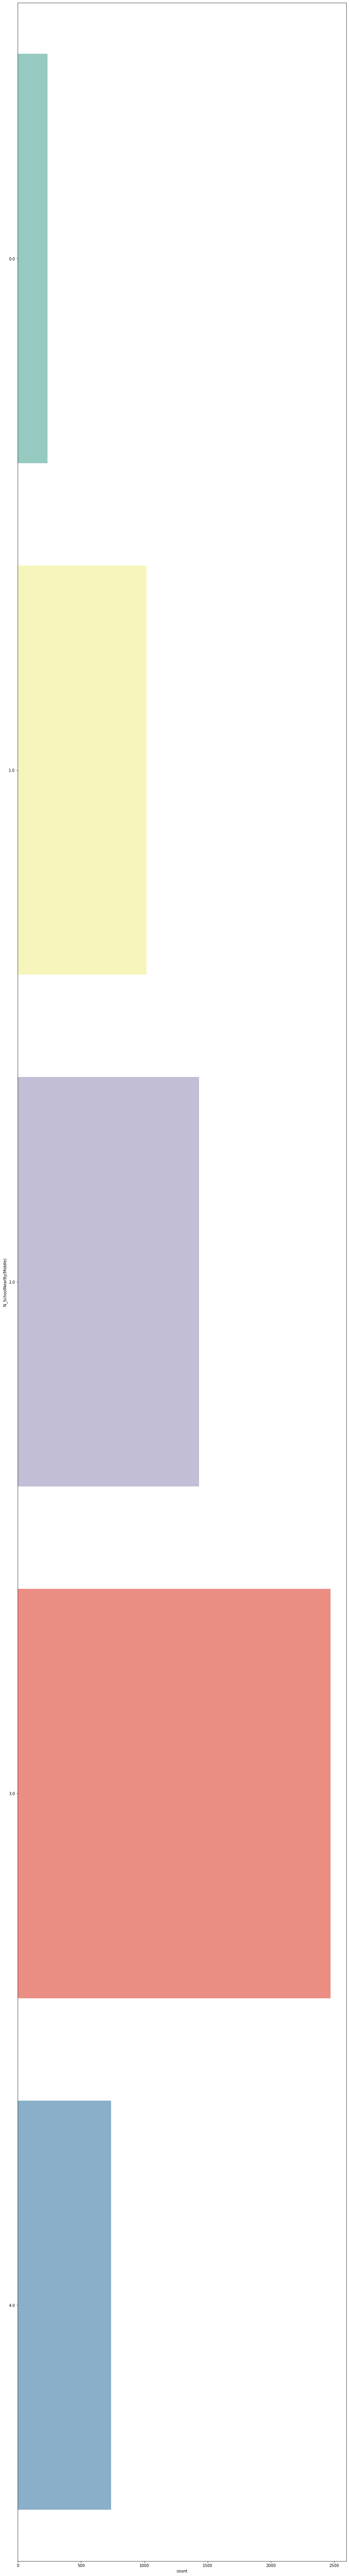

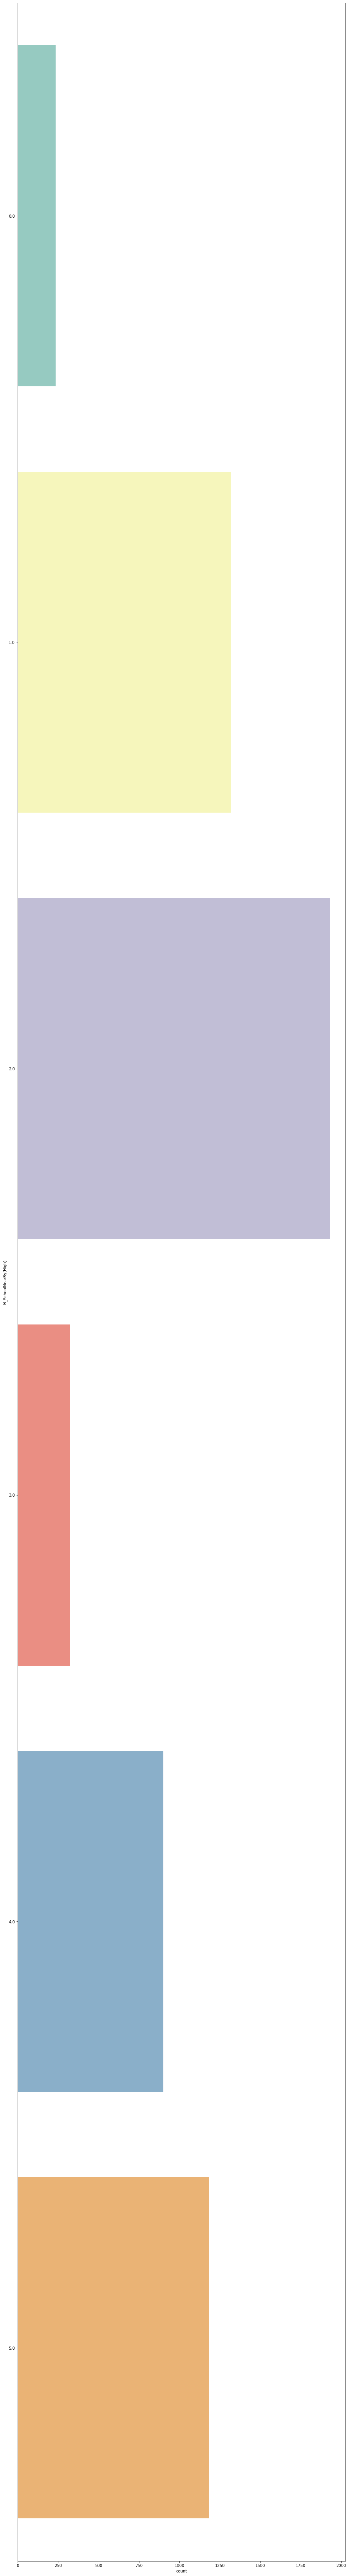

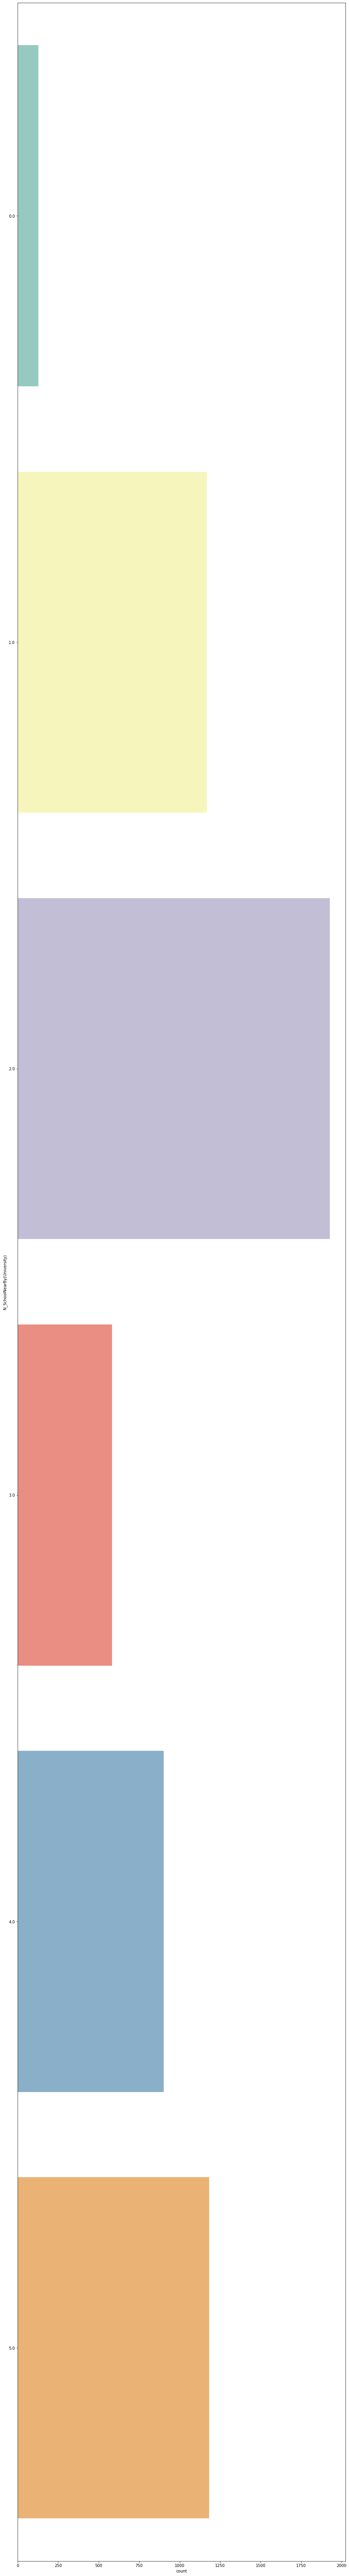

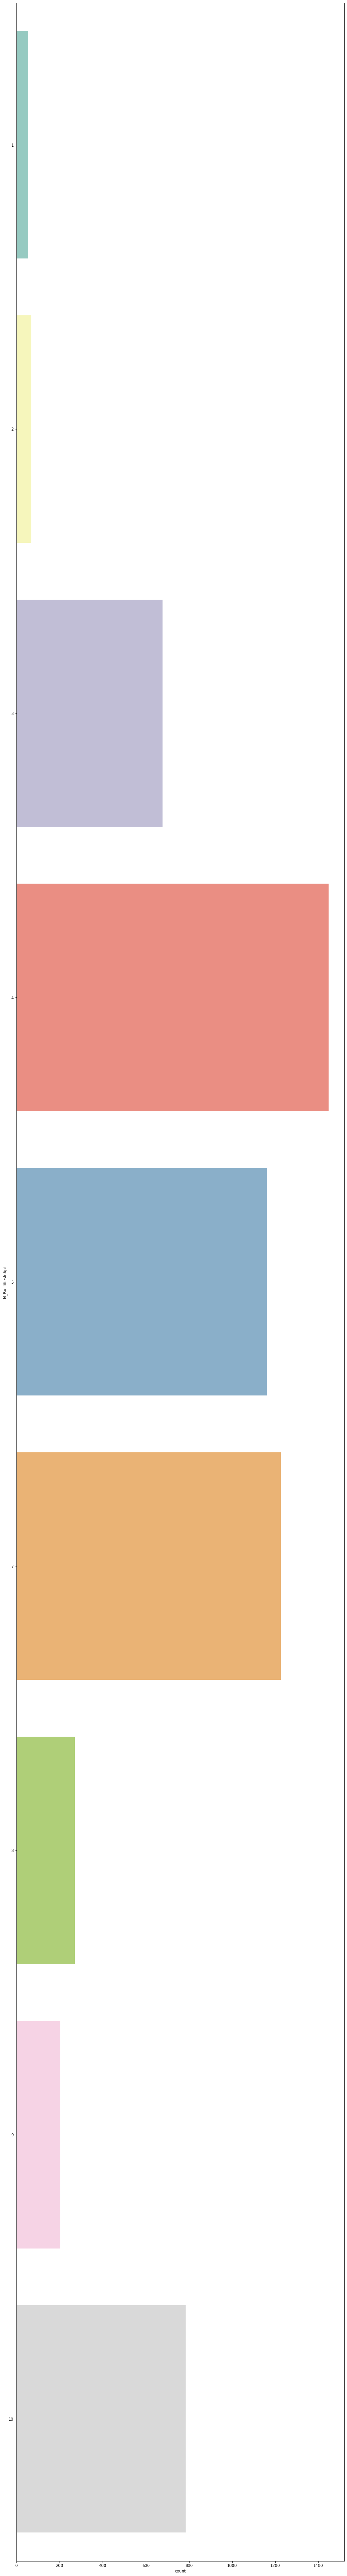

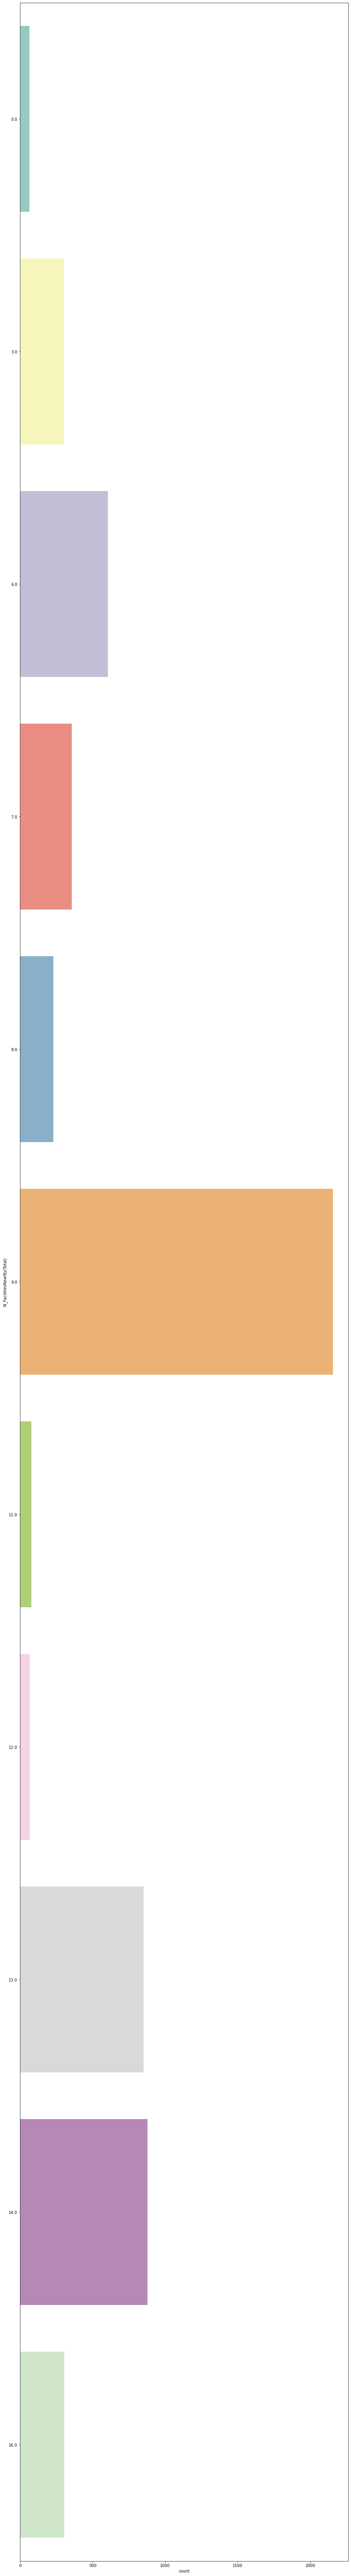

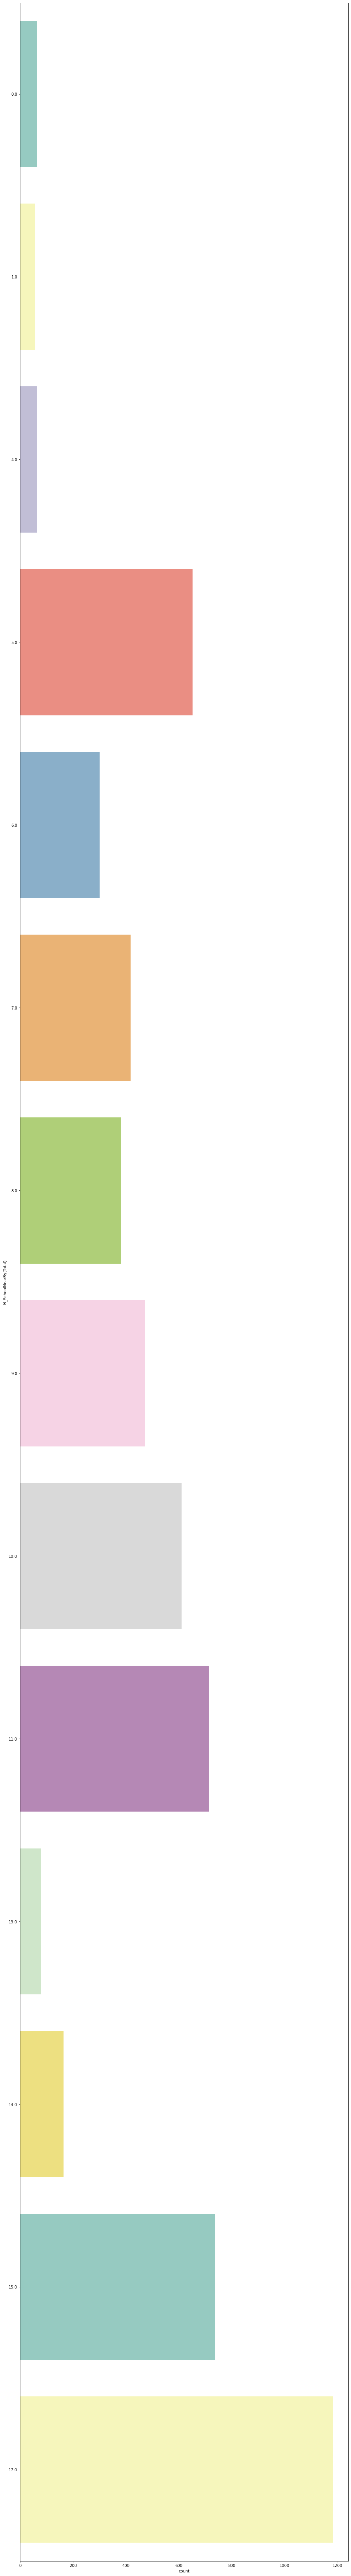

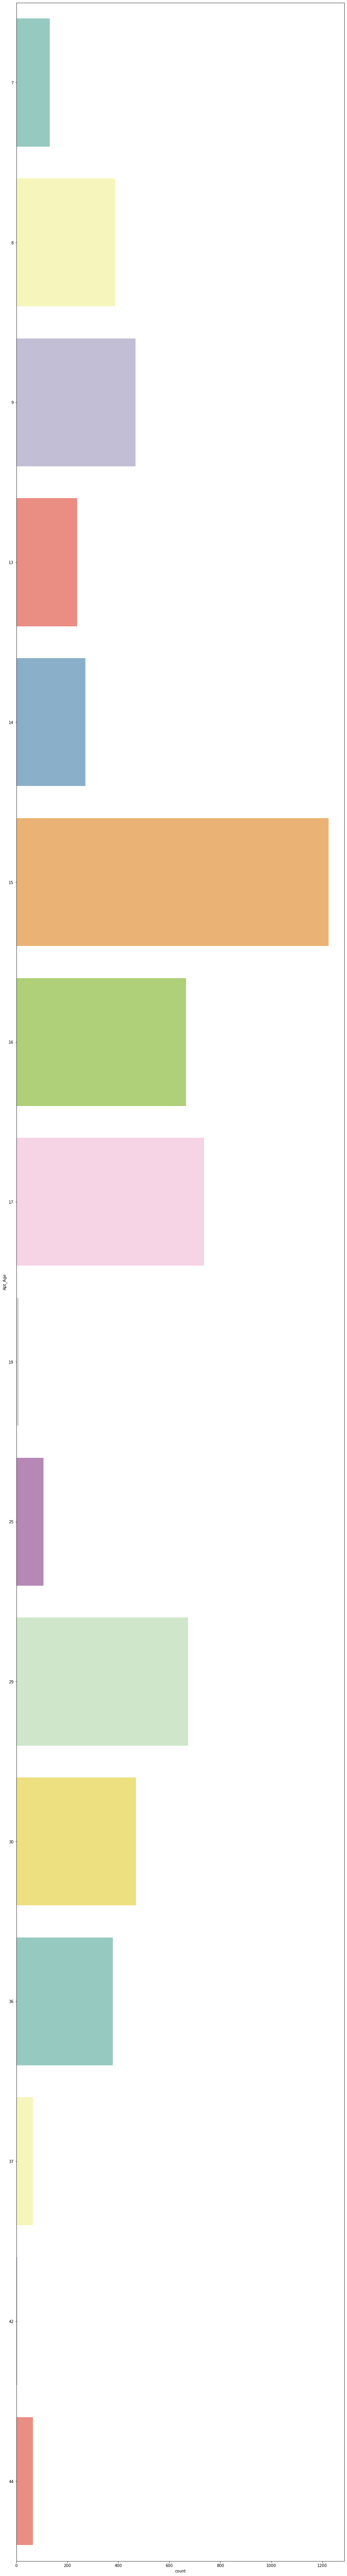

In [46]:
features = ['SalePrice', 'Size(sqf)', 'Floor', 'HallwayType', 'HeatingType',
       'AptManageType', 'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)',
       'TimeToBusStop', 'TimeToSubway', 'N_APT', 'N_manager', 'N_elevators',
       'SubwayStation', 'N_FacilitiesNearBy(PublicOffice)',
       'N_FacilitiesNearBy(Hospital)', 'N_FacilitiesNearBy(Dpartmentstore)',
       'N_FacilitiesNearBy(Mall)', 'N_FacilitiesNearBy(ETC)',
       'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(Elementary)',
       'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)',
       'N_SchoolNearBy(University)', 'N_FacilitiesInApt',
       'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)', 'Apt_Age']

for f in features:
    plt.figure(figsize = (15, 120))
    sns.countplot(y = f, data = df2, palette = 'Set3')# hue = 'Good Loan')
    #plt.yticks(rotation = 90)
    plt.show()

In [47]:
# Investigate all the elements whithin each Feature 
for column in df2:
    unique_vals = np.unique(df2[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values <10 for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values >10 for feature {} :{}'.format(column, nr_values))

The number of values >10 for feature SalePrice :949
The number of values >10 for feature Size(sqf) :92
The number of values >10 for feature Floor :43
The number of values <10 for feature HallwayType :3 -- ['corridor' 'mixed' 'terraced']
The number of values <10 for feature HeatingType :2 -- ['central_heating' 'individual_heating']
The number of values <10 for feature AptManageType :2 -- ['management_in_trust' 'self_management']
The number of values >10 for feature N_Parkinglot(Ground) :23
The number of values >10 for feature N_Parkinglot(Basement) :20
The number of values <10 for feature TimeToBusStop :3 -- ['0~5min' '10min~15min' '5min~10min']
The number of values <10 for feature TimeToSubway :5 -- ['0-5min' '10min~15min' '15min~20min' '5min~10min' 'no_bus_stop_nearby']
The number of values <10 for feature N_APT :9 -- [ 1.  2.  3.  5.  6.  7.  8. 10. 13.]
The number of values <10 for feature N_manager :9 -- [ 1.  2.  3.  4.  5.  6.  7.  8. 14.]
The number of values >10 for feature N_e

In [94]:
df2.columns

Index(['Size(sqf)', 'Floor', 'HallwayType', 'HeatingType', 'AptManageType',
       'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'TimeToBusStop',
       'TimeToSubway', 'N_APT', 'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)', 'Apt_Age', 'km_pred', 'ms_pred', 'db_pred',
       'ac_pred'],
      dtype='object')

In [98]:
corr_table = df2[['Size(sqf)', 'Floor', 'HallwayType', 'HeatingType', 'AptManageType',
       'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'TimeToBusStop',
       'TimeToSubway', 'N_APT', 'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)', 'Apt_Age', 'km_pred', 'ms_pred', 'db_pred',
       'ac_pred']].corr()
corr_table

,Size(sqf),Floor,HallwayType,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),...,N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),Apt_Age,km_pred,ms_pred,db_pred,ac_pred
Size(sqf),1.000000,0.179491,0.471958,0.190778,0.176163,0.029303,0.286365,0.244983,-0.317375,-0.021271,...,-0.257850,-0.292653,0.136406,-0.264944,-0.271667,-0.021282,0.268790,-0.329392,-0.188709,-0.135221
Floor,0.179491,1.000000,0.177291,-0.117295,0.334034,0.140585,0.247458,0.025635,-0.155500,0.005912,...,-0.059192,-0.031314,0.275527,-0.085556,-0.042605,-0.260568,0.070222,-0.156208,0.094799,0.004464
HallwayType,0.471958,0.177291,1.000000,-0.016865,0.408493,0.187436,0.278358,0.337367,-0.557597,-0.343851,...,-0.544172,-0.522913,0.515574,-0.608228,-0.502702,-0.559591,0.591209,-0.195714,-0.041001,-0.333845
N_Parkinglot(Ground),0.190778,-0.117295,-0.016865,1.000000,-0.386545,0.157956,0.040060,0.564172,0.096664,0.341447,...,0.156957,0.125159,-0.437136,0.120509,0.073379,0.546188,-0.156616,-0.199954,-0.372378,0.181085
N_Parkinglot(Basement),0.176163,0.334034,0.408493,-0.386545,1.000000,0.666546,0.701860,0.191411,-0.092837,0.097411,...,0.057189,0.116077,0.835622,0.040171,0.148652,-0.589949,-0.010229,-0.355003,0.277077,0.248254
N_APT,0.029303,0.140585,0.187436,0.157956,0.666546,1.000000,0.605161,0.512988,0.197965,0.297497,...,0.370367,0.413276,0.576641,0.245261,0.428775,-0.138750,-0.382870,-0.357083,0.047695,0.576353
N_manager,0.286365,0.247458,0.278358,0.040060,0.701860,0.605161,1.000000,0.555913,0.022702,0.023840,...,0.100471,0.104087,0.633528,0.135356,0.165308,-0.077896,-0.030389,-0.310204,0.162793,0.125938
N_elevators,0.244983,0.025635,0.337367,0.564172,0.191411,0.512988,0.555913,1.000000,0.135458,-0.142646,...,0.057335,0.060713,0.164246,0.035868,0.062627,0.205280,0.059821,-0.039238,0.029284,-0.021924
N_FacilitiesNearBy(PublicOffice),-0.317375,-0.155500,-0.557597,0.096664,-0.092837,0.197965,0.022702,0.135458,1.000000,0.273301,...,0.661604,0.740207,-0.229233,0.890958,0.702651,0.452542,-0.688630,0.179892,0.134648,0.523264
N_FacilitiesNearBy(Hospital),-0.021271,0.005912,-0.343851,0.341447,0.097411,0.297497,0.023840,-0.142646,0.273301,1.000000,...,0.582020,0.544224,-0.202515,0.533884,0.557860,0.242976,-0.587930,-0.448156,-0.212163,0.740387


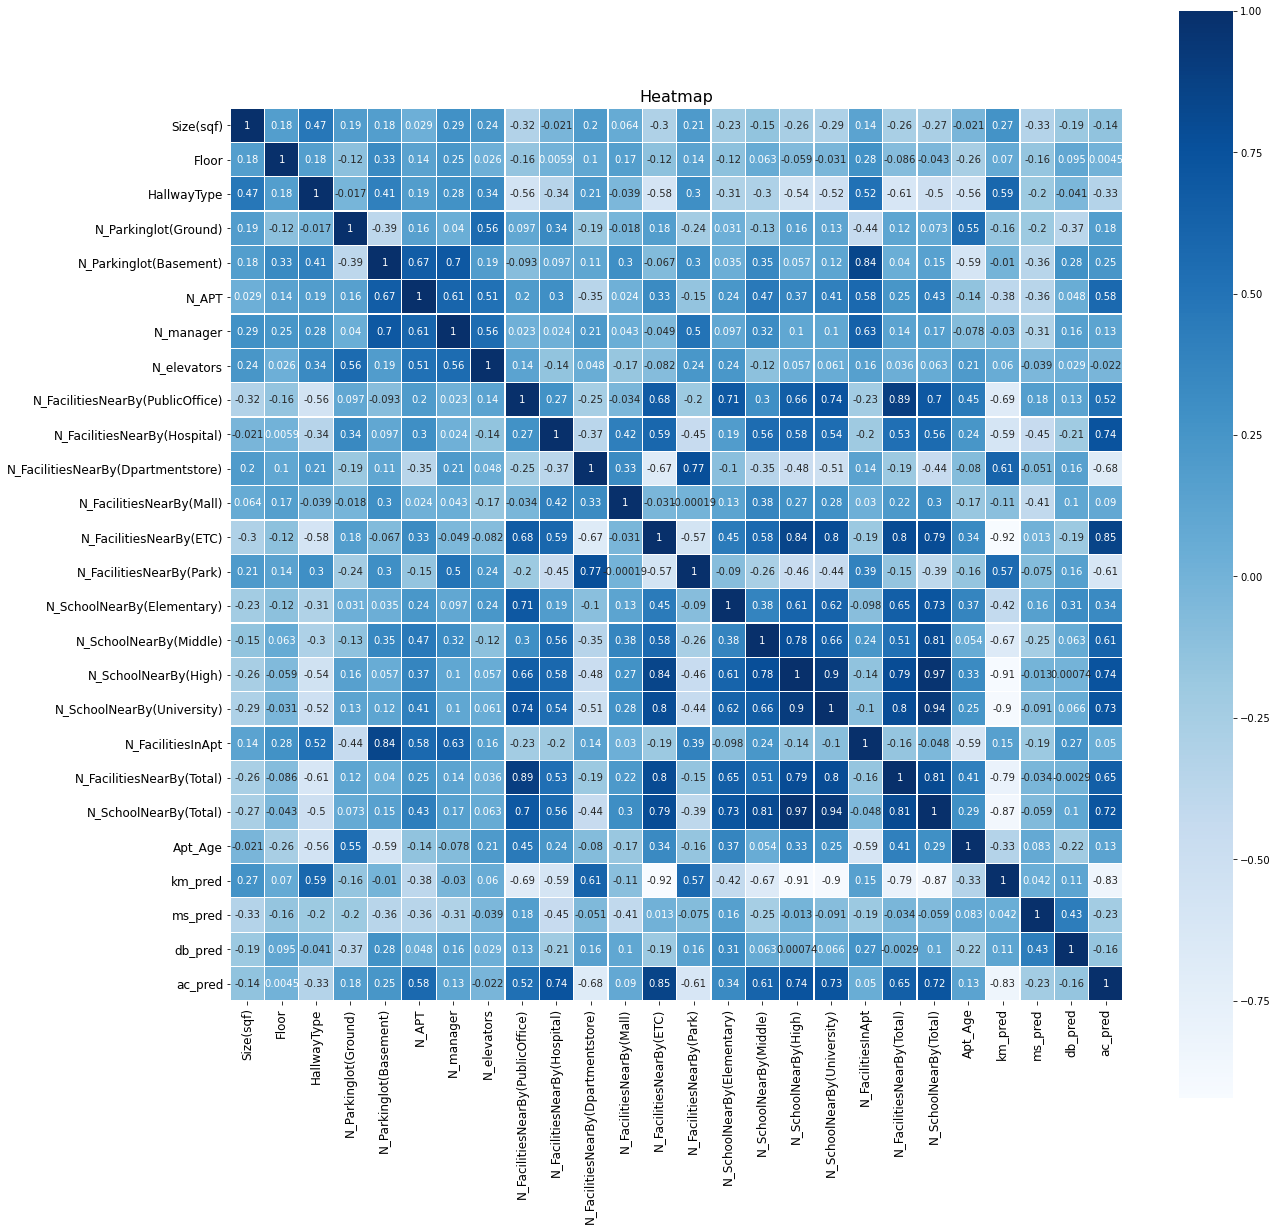

In [100]:
# Heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(corr_table, square = True, annot = True, linewidths = 0.2, cmap = 'Blues')
plt.title('Heatmap', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

In [101]:
df2.columns

Index(['Size(sqf)', 'Floor', 'HallwayType', 'HeatingType', 'AptManageType',
       'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'TimeToBusStop',
       'TimeToSubway', 'N_APT', 'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)', 'Apt_Age', 'km_pred', 'ms_pred', 'db_pred',
       'ac_pred'],
      dtype='object')

In [109]:
df2.dtypes

Size(sqf)                               int64
Floor                                   int64
HallwayType                             int32
HeatingType                            object
AptManageType                          object
N_Parkinglot(Ground)                  float64
N_Parkinglot(Basement)                float64
TimeToBusStop                          object
TimeToSubway                           object
N_APT                                 float64
N_manager                             float64
N_elevators                           float64
SubwayStation                          object
N_FacilitiesNearBy(PublicOffice)      float64
N_FacilitiesNearBy(Hospital)            int64
N_FacilitiesNearBy(Dpartmentstore)    float64
N_FacilitiesNearBy(Mall)              float64
N_FacilitiesNearBy(ETC)               float64
N_FacilitiesNearBy(Park)              float64
N_SchoolNearBy(Elementary)            float64
N_SchoolNearBy(Middle)                float64
N_SchoolNearBy(High)              

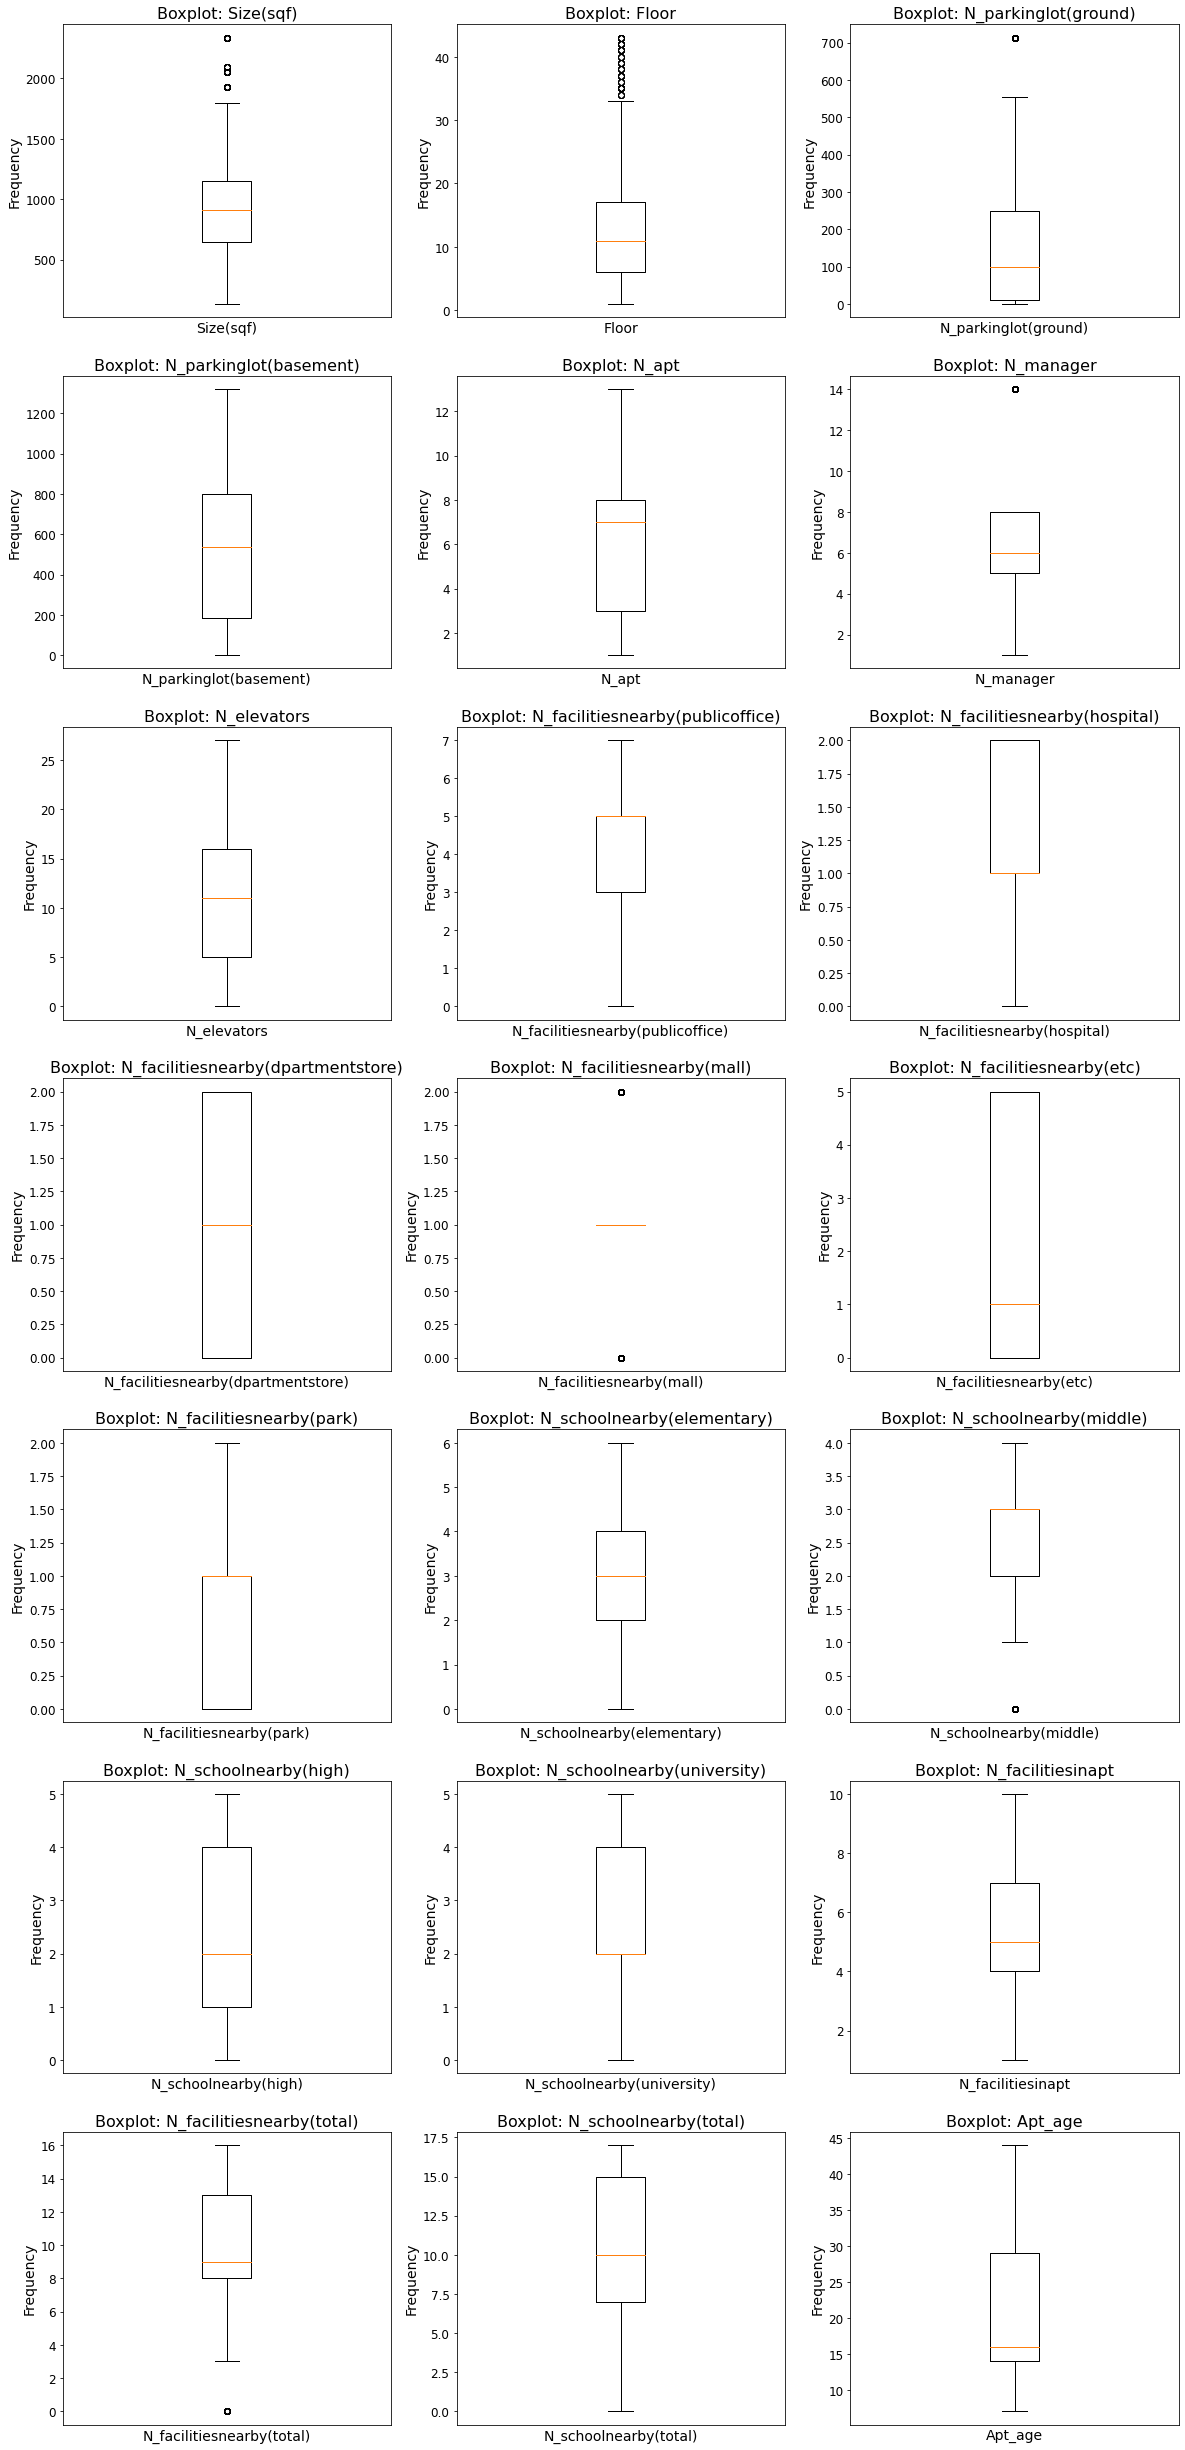

In [132]:
# Continuous variable distributions
continuous_vars = ['Size(sqf)', 'Floor', 'N_Parkinglot(Ground)',
                   'N_Parkinglot(Basement)', 'N_APT', 'N_manager', 'N_elevators',
                   'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
                   'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
                   'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(Elementary)',
                   'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
                   'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)',
                   'Apt_Age']

# Plot Boxplot size setting
plt.figure(figsize = (20, 70))
i = 1

# Loop for plots
for vars in continuous_vars:
  plt.subplot(11, 3, i)
  plt.boxplot(x = df2[vars])
  plt.title('Boxplot: ' + vars.capitalize(), size = 16)
  plt.xlabel(vars.capitalize(), size = 14)
  plt.xticks(ticks = [])
  plt.yticks(size = 12)
  plt.ylabel('Frequency', size = 14)
  i += 1

C:\Users\vishal.desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size(sqf)'>

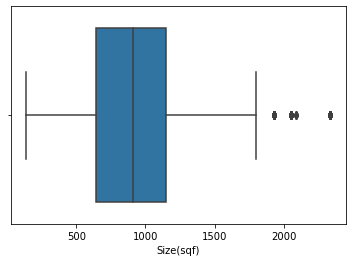

In [143]:
sns.boxplot(df2['Size(sqf)'])

In [165]:
df2.describe()

,Size(sqf),Floor,HallwayType,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),...,N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),Apt_Age,km_pred,ms_pred,db_pred,ac_pred
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,955.569173,12.026311,1.496860,195.883551,570.761670,5.613648,6.310304,11.145985,4.141572,1.296045,...,2.659311,2.764726,5.809540,9.870820,10.864200,19.032592,0.646410,3.728230,3.735359,0.273977
std,382.464050,7.548743,0.682885,218.597210,408.621075,2.811831,3.174088,7.806232,1.793496,0.479760,...,1.556041,1.489289,2.330804,3.450319,4.438513,8.811782,0.478124,3.548689,2.779638,0.446035
min,135.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,644.000000,6.000000,1.000000,11.000000,184.000000,3.000000,5.000000,5.000000,3.000000,1.000000,...,1.000000,2.000000,4.000000,8.000000,7.000000,14.000000,0.000000,1.000000,2.000000,0.000000
50%,910.000000,11.000000,2.000000,100.000000,536.000000,7.000000,6.000000,11.000000,5.000000,1.000000,...,2.000000,2.000000,5.000000,9.000000,10.000000,16.000000,1.000000,3.000000,3.000000,0.000000
75%,1149.000000,17.000000,2.000000,249.000000,798.000000,8.000000,8.000000,16.000000,5.000000,2.000000,...,4.000000,4.000000,7.000000,13.000000,15.000000,29.000000,1.000000,6.000000,6.000000,1.000000
max,2337.000000,43.000000,2.000000,713.000000,1321.000000,13.000000,14.000000,27.000000,7.000000,2.000000,...,5.000000,5.000000,10.000000,16.000000,17.000000,44.000000,1.000000,15.000000,12.000000,1.000000


In [169]:
df2[df2['Size(sqf)'] <= 135]

,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,...,N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),Apt_Age,km_pred,ms_pred,db_pred,ac_pred
3601,135,14,0,individual_heating,self_management,0.0,218.0,10min~15min,5min~10min,1.0,...,0.0,1.0,1,6.0,1.0,8,1,14,10,0
3602,135,13,0,individual_heating,self_management,0.0,218.0,10min~15min,5min~10min,1.0,...,0.0,1.0,1,6.0,1.0,8,1,14,10,0
3664,135,18,0,individual_heating,self_management,0.0,218.0,10min~15min,5min~10min,1.0,...,0.0,1.0,1,6.0,1.0,8,1,14,10,0
3811,135,12,0,individual_heating,self_management,0.0,218.0,10min~15min,5min~10min,1.0,...,0.0,1.0,1,6.0,1.0,8,1,14,10,0
3812,135,13,0,individual_heating,self_management,0.0,218.0,10min~15min,5min~10min,1.0,...,0.0,1.0,1,6.0,1.0,8,1,14,10,0
3877,135,11,0,individual_heating,self_management,0.0,218.0,10min~15min,5min~10min,1.0,...,0.0,1.0,1,6.0,1.0,8,1,14,10,0
3878,135,19,0,individual_heating,self_management,0.0,218.0,10min~15min,5min~10min,1.0,...,0.0,1.0,1,6.0,1.0,8,1,14,10,0
3979,135,11,0,individual_heating,self_management,0.0,218.0,10min~15min,5min~10min,1.0,...,0.0,1.0,1,6.0,1.0,8,1,14,10,0
4347,135,15,0,individual_heating,self_management,0.0,218.0,10min~15min,5min~10min,1.0,...,0.0,1.0,1,6.0,1.0,8,1,14,10,0
4348,135,17,0,individual_heating,self_management,0.0,218.0,10min~15min,5min~10min,1.0,...,0.0,1.0,1,6.0,1.0,8,1,14,10,0


In [141]:
print(np.where(df2['Size(sqf)'] < 150))

(array([3601, 3602, 3664, 3811, 3812, 3877, 3878, 3979, 4347, 4348, 4349,
       4457, 4459, 4521, 4801, 4838, 4839, 4840, 4948, 4949, 4983, 5029,
       5031, 5082, 5322, 5573, 5575, 5819], dtype=int64),)


In [129]:
 df2[df2['Size(sqf)'] == 33].count()

Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0
N_SchoolNearBy(High)                  0
N_SchoolNearBy(University)            0
N_FacilitiesInApt                     0
N_FacilitiesNearBy(Total)             0


In [70]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df2['HallwayType'] = label_encoder.fit_transform(df2['HallwayType'])
 
df2['HallwayType'].unique()

array([2, 0, 1])

In [71]:
df_encoded = pd.get_dummies(df2, columns = ['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop',
                                    'TimeToSubway', 'SubwayStation'])

In [72]:
print(df_encoded.apply(lambda col: col.unique()))

Size(sqf)                              [814, 587, 2056, 1761, 355, 644, 1377, 914, 86...
Floor                                  [3, 8, 6, 5, 2, 10, 13, 4, 11, 18, 7, 24, 1, 2...
N_Parkinglot(Ground)                   [111.0, 80.0, 249.0, 523.0, 200.0, 142.0, 713....
N_Parkinglot(Basement)                 [184.0, 76.0, 536.0, 0.0, 79.0, 1270.0, 18.0, ...
N_APT                                    [3.0, 1.0, 6.0, 8.0, 7.0, 2.0, 10.0, 5.0, 13.0]
N_manager                                 [3.0, 2.0, 5.0, 8.0, 4.0, 14.0, 1.0, 6.0, 7.0]
N_elevators                            [0.0, 2.0, 11.0, 20.0, 10.0, 8.0, 27.0, 16.0, ...
N_FacilitiesNearBy(PublicOffice)                [2.0, 5.0, 1.0, 6.0, 7.0, 3.0, 4.0, 0.0]
N_FacilitiesNearBy(Hospital)                                                   [1, 2, 0]
N_FacilitiesNearBy(Dpartmentstore)                                       [1.0, 2.0, 0.0]
N_FacilitiesNearBy(Mall)                                                 [1.0, 0.0, 2.0]
N_FacilitiesNearBy(ET

In [73]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(df_encoded)

In [74]:
# We wills start with 5 clusters
kmeans = KMeans(n_clusters = 4, random_state = 540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [1 2 2 ... 1 2 1]
The Inertia is:  162238.28940122345


In [75]:
kmeans.labels_.shape

(5891,)

In [194]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-0.220121,0.007267,0.294782,0.404124,0.938223,0.205009,-0.035689,0.851802,1.205249,-1.105301,...,0.669288,-0.205187,1.002068,-0.381366,-0.141103,-0.120996,-0.622171,0.659053,-0.352472,-0.271346
1,0.321324,0.104780,-0.067297,0.127869,-0.140278,0.127745,0.168911,-0.625506,-0.454247,0.415533,...,-0.340669,0.147220,-0.378148,0.273628,-0.141103,-0.072100,0.404154,-0.478723,0.180364,0.131243
2,-0.881778,-0.438164,-0.289195,-1.287895,-1.219760,-0.907970,-0.616012,0.909890,-0.457150,0.423467,...,0.104209,-0.205187,-0.378148,-0.381366,0.840286,0.522537,-0.451080,0.682771,-0.058745,-0.014419


In [76]:
# How to find the best number if Ks?
# Running K means with multible Ks
no_of_clusters = range(1, 50) #[2,3,4,5,6,7,8,9]
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters = f, random_state = 2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 1 Clusters is: 259204.0000000005
The innertia for : 2 Clusters is: 203756.27404308657
The innertia for : 3 Clusters is: 179582.3466141912
The innertia for : 4 Clusters is: 161903.27839842121
The innertia for : 5 Clusters is: 142009.65337029373
The innertia for : 6 Clusters is: 121873.73678994551
The innertia for : 7 Clusters is: 112280.70128392085
The innertia for : 8 Clusters is: 94927.71595431695
The innertia for : 9 Clusters is: 84071.37408866003
The innertia for : 10 Clusters is: 72292.34174956373
The innertia for : 11 Clusters is: 62427.00413138906
The innertia for : 12 Clusters is: 55960.448786633344
The innertia for : 13 Clusters is: 49685.002697188895
The innertia for : 14 Clusters is: 42258.019876768354
The innertia for : 15 Clusters is: 36107.606571744276
The innertia for : 16 Clusters is: 31595.58682825798
The innertia for : 17 Clusters is: 28427.077241201165
The innertia for : 18 Clusters is: 23650.77587386475
The innertia for : 19 Clusters is: 20046.1821

In [77]:
no_of_clusters

range(1, 50)

Text(0.5, 1.0, 'Inertia Plot per k')

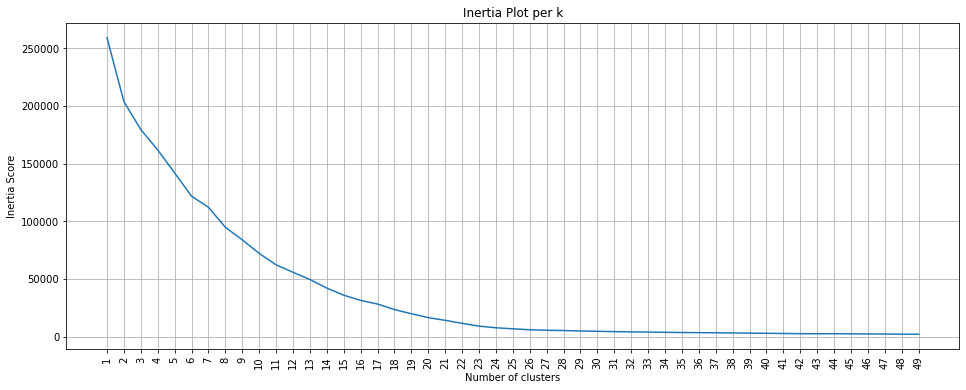

In [78]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [81]:
# Running K means on 5 clusters
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts = True)
counts = counts.reshape(1, 3)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 1","Cluster 2", "Cluster 3"])

# display
countscldf

,Cluster 1,Cluster 2,Cluster 3
0,1614,3430,847


In [195]:
kmeans.inertia_

179582.3466141912

In [196]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [197]:
silhouette_score(X_train, kmeans.labels_)

0.28877656599691226

In [198]:
silhouette_samples(X_train, kmeans.labels_)

array([0.21387379, 0.11506222, 0.11577763, ..., 0.27808705, 0.07801767,
       0.28043728])

In [199]:
WCSS = [] # For Elbow Method
silhouette_coefficients = [] # For Silhouette Method
K = 15
for i in range(2, K+1): # Notice you start at 2 clusters for Silhouette Coeffcient
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_train)
    WCSS.append(kmeans.inertia_)
    scores = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(scores)

In [200]:
optimal_k = pd.DataFrame({'K':range(2, K+1), 'WCSS':WCSS, 'Silhouette_Score':silhouette_coefficients})
optimal_k

,K,WCSS,Silhouette_Score
0,2,203756.274043,0.252203
1,3,179582.346614,0.288777
2,4,155278.813854,0.341081
3,5,138613.970913,0.327389
4,6,122258.356311,0.402944
5,7,109319.478096,0.404925
6,8,97443.922877,0.453858
7,9,85009.883317,0.491136
8,10,73736.483095,0.505846
9,11,64680.257256,0.542953


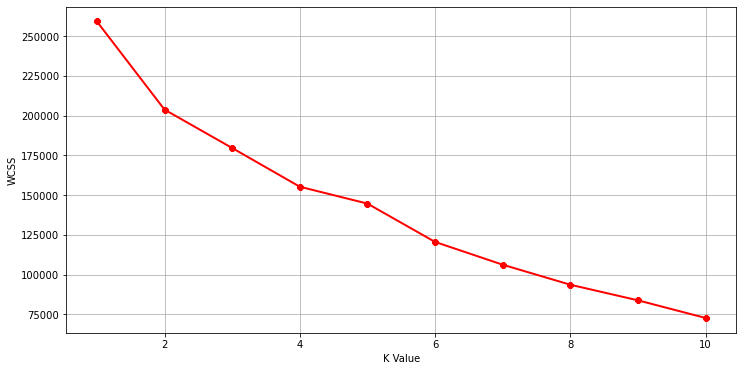

In [201]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

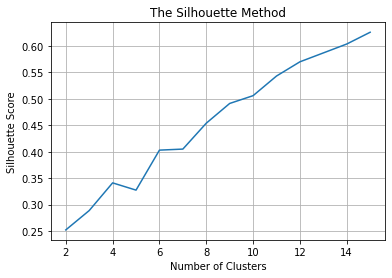

In [204]:
sns.lineplot(x = 'K', y = silhouette_coefficients, data = optimal_k)
plt.grid()
#sns.figsize = (12, 6)
#plt.figure(figsize = (12, 6))
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [83]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_train) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']   
X = X_principal
X.head()

,P1,P2
0,1.634277,2.368885
1,0.768439,6.107721
2,0.757070,6.146383
3,3.098620,-0.368701
4,-5.088686,-0.529810


In [87]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering

In [88]:
df2['km_pred'] = KMeans(n_clusters = 2).fit_predict(X)
df2['ms_pred'] = MeanShift(bandwidth = 1).fit_predict(X)
df2['db_pred'] = DBSCAN(eps=1).fit_predict(X)
df2['ac_pred'] = AgglomerativeClustering(n_clusters=2).fit_predict(X)
df2.sample(10)

,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,...,N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),Apt_Age,km_pred,ms_pred,db_pred,ac_pred
4530,644,11,1,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,...,5.0,5.0,4,14.0,17.0,29,0,2,3,1
4739,644,1,2,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,7.0,...,2.0,3.0,7,9.0,11.0,9,1,5,9,0
5430,288,7,0,individual_heating,management_in_trust,11.0,108.0,0~5min,5min~10min,1.0,...,2.0,2.0,2,8.0,8.0,8,1,4,0,0
4682,644,6,2,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,7.0,...,2.0,3.0,7,9.0,11.0,9,1,5,9,0
2031,914,1,1,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,...,5.0,5.0,4,14.0,17.0,29,0,2,3,1
3379,857,13,2,individual_heating,management_in_trust,123.0,181.0,5min~10min,0-5min,3.0,...,3.0,1.0,4,8.0,11.0,16,1,11,8,0
1679,644,12,1,individual_heating,management_in_trust,82.0,56.0,5min~10min,15min~20min,1.0,...,0.0,3.0,5,13.0,7.0,25,1,7,7,0
2917,736,4,2,individual_heating,management_in_trust,90.0,1174.0,0~5min,0-5min,10.0,...,5.0,5.0,9,14.0,17.0,42,0,1,3,1
4615,644,6,2,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,7.0,...,2.0,3.0,7,9.0,11.0,9,1,5,9,0
3939,2056,7,2,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,6.0,...,1.0,2.0,5,3.0,7.0,16,1,0,2,0


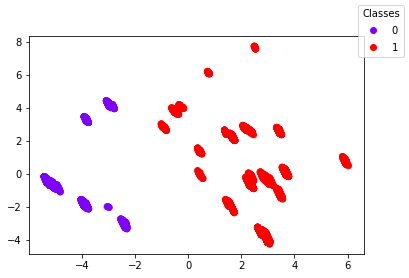

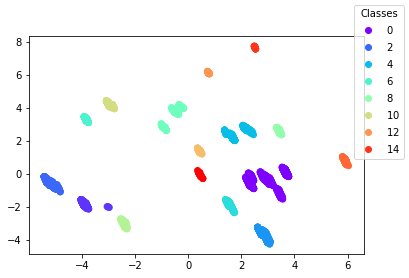

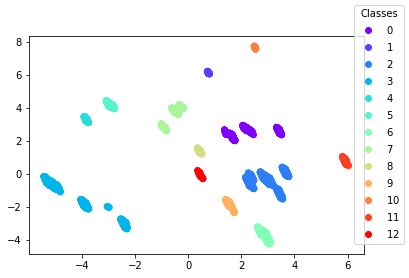

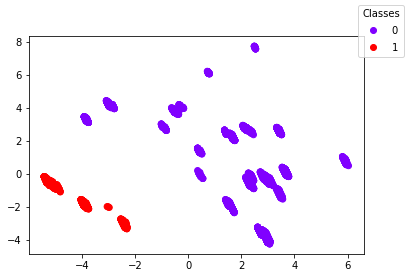

In [89]:
for i in range(-4,0):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X['P1'], X['P2'], c = df2.iloc[:,i], cmap ='rainbow')
    legend = fig.legend(*scatter.legend_elements(), loc = 'upper right', title = "Classes")

In [170]:
df2.km_pred.value_counts()

1    3808
0    2083
Name: km_pred, dtype: int64

In [190]:
df2.loc[df2['km_pred'] == '0']

,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,...,N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),Apt_Age,km_pred,ms_pred,db_pred,ac_pred
4,1761,3,1,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,...,5.0,5.0,4,14.0,17.0,29,0,2,3,1
5,355,5,0,individual_heating,management_in_trust,200.0,0.0,5min~10min,10min~15min,3.0,...,5.0,5.0,3,16.0,17.0,30,0,6,4,0
6,644,2,1,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,3.0,...,4.0,4.0,3,9.0,14.0,30,0,10,5,0
7,644,10,1,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,...,5.0,5.0,4,14.0,17.0,29,0,2,3,1
8,644,3,1,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,...,5.0,5.0,4,14.0,17.0,29,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,914,15,1,individual_heating,management_in_trust,67.0,798.0,0~5min,5min~10min,8.0,...,4.0,4.0,7,13.0,15.0,17,0,1,3,1
5865,355,6,0,individual_heating,management_in_trust,200.0,0.0,5min~10min,10min~15min,3.0,...,5.0,5.0,3,16.0,17.0,30,0,6,4,0
5867,1088,22,2,individual_heating,management_in_trust,90.0,1174.0,0~5min,0-5min,10.0,...,5.0,5.0,9,14.0,17.0,8,0,9,3,1
5869,644,7,1,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,...,5.0,5.0,4,14.0,17.0,29,0,2,3,1


In [192]:
df2.loc[df2['km_pred'] == 1]

,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,...,N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),Apt_Age,km_pred,ms_pred,db_pred,ac_pred
0,814,3,2,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,...,2.0,2.0,5,6.0,9.0,16,1,4,0,0
1,587,8,0,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,...,1.0,0.0,3,12.0,4.0,37,1,12,1,0
2,587,6,0,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,...,1.0,0.0,3,12.0,4.0,37,1,12,1,0
3,2056,8,2,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,6.0,...,1.0,2.0,5,3.0,7.0,16,1,0,2,0
10,1377,4,2,central_heating,management_in_trust,713.0,0.0,0~5min,10min~15min,7.0,...,1.0,1.0,4,9.0,6.0,36,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,1643,19,2,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,...,2.0,2.0,10,9.0,10.0,15,1,3,6,0
5887,903,13,2,individual_heating,management_in_trust,123.0,181.0,5min~10min,0-5min,3.0,...,3.0,1.0,4,8.0,11.0,16,1,11,8,0
5888,868,20,2,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,...,2.0,2.0,10,9.0,10.0,15,1,3,6,0
5889,1327,1,0,individual_heating,self_management,87.0,0.0,0~5min,0-5min,2.0,...,3.0,2.0,3,7.0,11.0,44,1,7,7,0


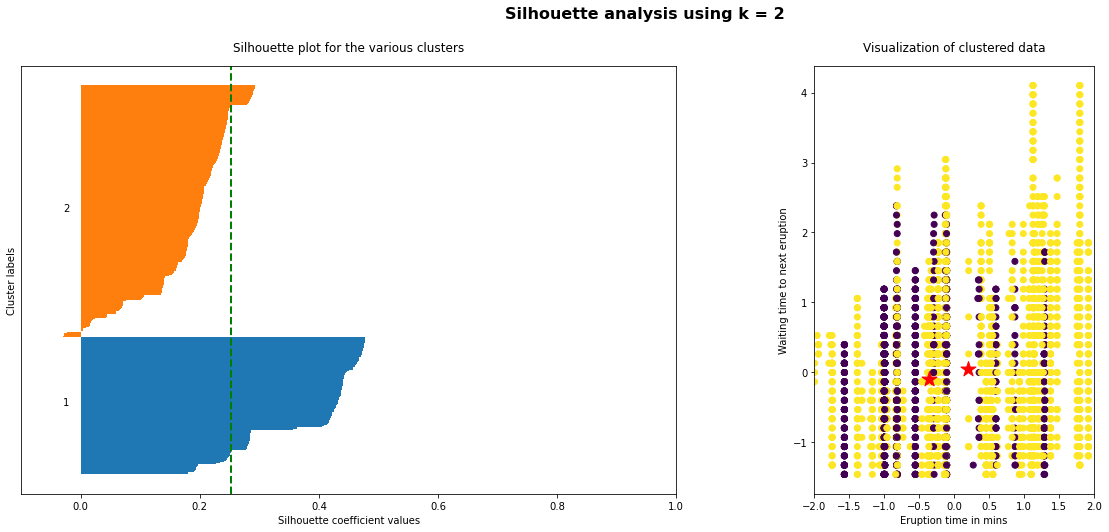

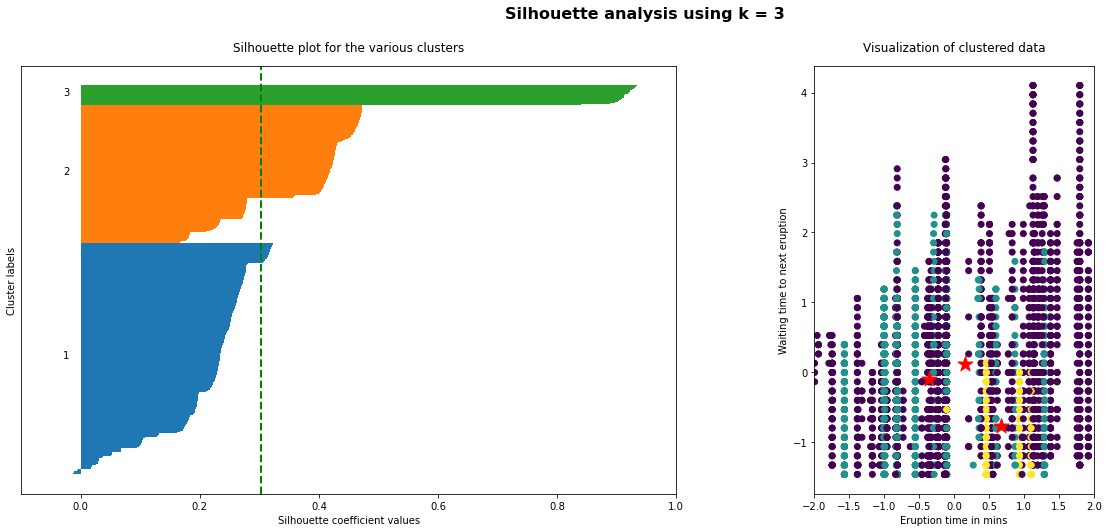

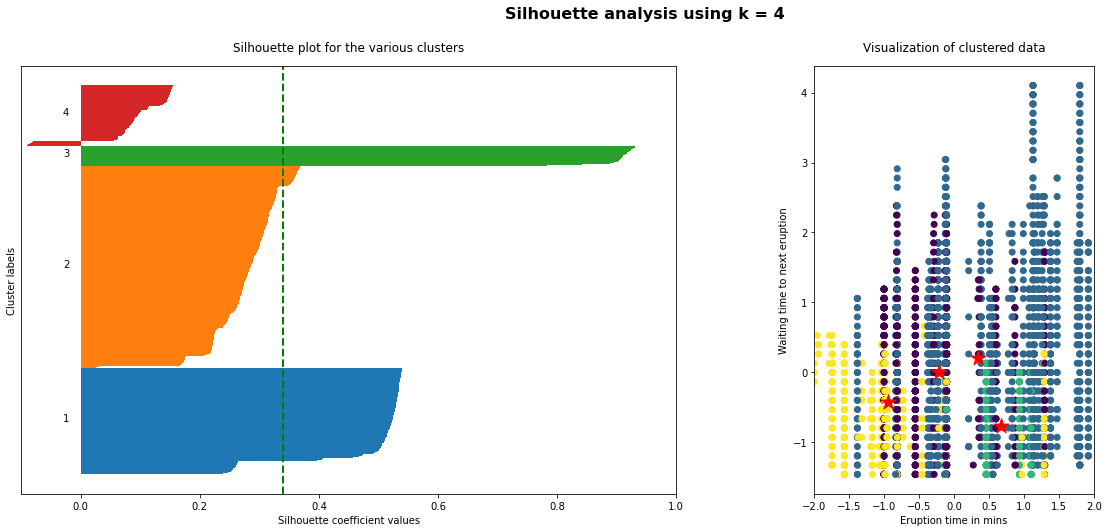

In [205]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters = k)
    labels = km.fit_predict(X_train)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_train, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);